# **Datasets**

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
df = pd.read_csv('data/query.csv')
df.head(10)

time  latitude  longitude    depth  mag magType    nst  \
0  2023-12-31T16:36:23.043Z   27.7270    85.7990   22.322  4.6      mb   60.0   
1  2023-12-25T23:03:56.507Z   34.7111    76.7782   34.705  4.6      mb  100.0   
2  2023-12-19T12:14:23.981Z   18.1110    95.9762   10.000  4.5      mb   49.0   
3  2023-12-18T22:20:45.046Z    5.9749    94.8546    9.334  4.5      mb   63.0   
4  2023-12-18T10:31:29.554Z   33.1609    76.6962   10.000  4.8     mww   92.0   
5  2023-12-18T10:18:52.984Z   33.1836    76.8401   10.000  5.1     mww  119.0   
6  2023-12-17T04:17:06.162Z   36.2885    76.3623   10.000  4.6      mb   32.0   
7  2023-12-12T02:05:45.531Z   36.3970    70.6032  152.821  4.9      mb   91.0   
8  2023-12-10T03:38:19.102Z   36.3106    69.9711  144.121  4.5      mb   62.0   
9  2023-12-05T14:45:03.410Z    9.3573    93.9828   10.000  4.8      mb   75.0   

   gap   dmin   rms  ...                   updated  \
0   99  0.466  0.55  ...  2024-03-02T21:39:35.040Z   
1   79  3.096  0.40  ...  2024-03-02T21:39:40.040Z   
2  154  2.840  0.83  ...  2024-02-27T22:57:01.040Z   
3   80  2.211  0.44  ...  2024-02-27T22:57:01.040Z   
4   51  6.514  0.73  ...  2024-02-27T22:57:00.040Z   
5   32  3.023  0.97  ...  2024-02-27T22:57:00.040Z   
6   86  3.658  1.36  ...  2024-02-27T22:56:59.040Z   
7   20  2.248  0.62  ...  2024-02-17T22:43:06.040Z   
8   56  1.922  1.21  ...  2024-02-17T22:43:05.040Z   
9   47  5.047  0.77  ...  2024-02-10T23:47:35.040Z   

                               place        type horizontalError depthError  \
0         27 km E of Nagarkot, Nepal  earthquake            9.97      2.373   
1            24 km S of Thang, India  earthquake            5.88      5.172   
2    43 km NNE of Letpandan, Myanmar  earthquake            7.47      1.904   
3       51 km W of Sabang, Indonesia  earthquake            9.33      4.016   
4          38 km SSW of Padam, India  earthquake            7.42      1.799   
5            31 km S of Padam, India  earthquake            2.84      1.760   
6     128 km NNE of Skardu, Pakistan  earthquake            9.02      1.940   
7     55 km SSW of Jurm, Afghanistan  earthquake            6.87      1.505   
8  30 km SSE of Farkhār, Afghanistan  earthquake            4.64      6.315   
9    289 km SSE of Port Blair, India  earthquake            8.36      1.805   

   magError  magNst    status  locationSource magSource  
0     0.064      73  reviewed              us        us  
1     0.059      85  reviewed              us        us  
2     0.100      29  reviewed              us        us  
3     0.083      42  reviewed              us        us  
4     0.098      10  reviewed              us        us  
5     0.080      15  reviewed              us        us  
6     0.146      14  reviewed              us        us  
7     0.044     162  reviewed              us        us  
8     0.071      58  reviewed              us        us  
9     0.077      52  reviewed              us        us  

[10 rows x 22 columns]

In [4]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             1066 non-null   object 
 1   latitude         1066 non-null   float64
 2   longitude        1066 non-null   float64
 3   depth            1066 non-null   float64
 4   mag              1066 non-null   float64
 5   magType          1066 non-null   object 
 6   nst              349 non-null    float64
 7   gap              1066 non-null   int64  
 8   dmin             1066 non-null   float64
 9   rms              1066 non-null   float64
 10  net              1066 non-null   object 
 11  id               1066 non-null   object 
 12  updated          1066 non-null   object 
 13  place            1066 non-null   object 
 14  type             1066 non-null   object 
 15  horizontalError  1066 non-null   float64
 16  depthError       1066 non-null   float64
 17  magError      

## API Dataset Calling

In [2]:
import requests
import geopandas as gpd
import pandas as pd
import geojson

In [3]:
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query.geojson?starttime=2023-05-01%2000:00:00&endtime=2024-01-01%2000:00:00&minmagnitude=2.5&orderby=time'

In [4]:
def url_data_call(URL) -> pd.DataFrame:
    response = requests.get(URL)

    if response.status_code == 200:
        # Load GeoJSON data from the response text
        geojson_data = geojson.loads(response.text)

        # Extract features from GeoJson
        features = geojson_data['features']

        # Convert GeoJSON to GeoDataFrame
        gdf = gpd.GeoDataFrame.from_features(features)

    return gdf

In [19]:
data.columns

Index(['id', 'mag', 'place', 'time', 'updated', 'tz', 'url', 'detail', 'felt',
       'cdi', 'mmi', 'alert', 'status', 'tsunami', 'sig', 'net', 'code', 'ids',
       'sources', 'types', 'nst', 'dmin', 'rms', 'gap', 'magType', 'type',
       'title', 'geometry'],
      dtype='object')

In [20]:
data.isna().sum()

id              0
mag             0
place           0
time            0
updated         0
tz          18312
url             0
detail          0
felt        15554
cdi         15554
mmi         17180
alert       17743
status          0
tsunami         0
sig             0
net             0
code            0
ids             0
sources         0
types           0
nst          1156
dmin         1522
rms             1
gap          1157
magType         0
type            0
title           0
geometry        0
dtype: int64

In [18]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18312 entries, 0 to 18311
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        18312 non-null  object  
 1   mag       18312 non-null  float64 
 2   place     18312 non-null  object  
 3   time      18312 non-null  int64   
 4   updated   18312 non-null  int64   
 5   tz        0 non-null      object  
 6   url       18312 non-null  object  
 7   detail    18312 non-null  object  
 8   felt      2758 non-null   float64 
 9   cdi       2758 non-null   float64 
 10  mmi       1132 non-null   float64 
 11  alert     569 non-null    object  
 12  status    18312 non-null  object  
 13  tsunami   18312 non-null  int64   
 14  sig       18312 non-null  int64   
 15  net       18312 non-null  object  
 16  code      18312 non-null  object  
 17  ids       18312 non-null  object  
 18  sources   18312 non-null  object  
 19  types     18312 non-null  object  
 20

In [23]:
def data_preprocessing() -> pd.DataFrame:
    data2 = url_data_call(url).drop(columns=[
        'tz', 'url',
        'detail', 'felt', 
        'cdi', 'mmi', 'alert',
        'status', 'tsunami', 'sig',
        'net', 'code', 'ids',
        'sources', 'sources', 'nst',
        'title', 'types', 'gap',
    ])

    eq_data = data2.loc[data2['type'] == 'earthquake']

    eq_data = eq_data.copy()
    eq_data.drop('type', axis=1, inplace=True)

    eq_data['time'] = pd.to_datetime(eq_data['time'], unit='ms')
    eq_data['updated'] = pd.to_datetime(eq_data['time'], unit='ms')

    eq_data['coords'] = eq_data['geometry'].apply(lambda geom: list(geom.coords))

    x = []
    y = []
    z = []

    for coord_vals in eq_data['coords']:
        x.append(coord_vals[0][0])
        y.append(coord_vals[0][1])
        z.append(coord_vals[0][2])

    eq_data['longitude'] = x
    eq_data['latitude'] = y
    eq_data['elevation'] = z

    eq_data.drop(columns=['place', 'geometry', 'coords'], inplace=True)
    
    return eq_data

In [33]:
data2['type'].unique()

array(['earthquake', 'mining explosion', 'explosion', 'ice quake',
       'landslide', 'volcanic eruption', 'Landslide', 'quarry blast'],
      dtype=object)

In [35]:
data2

mag                                   place           time  \
0      4.20  60 km WSW of Angoram, Papua New Guinea  1704064689731   
1      4.20     13 km E of Vanimo, Papua New Guinea  1704063151316   
2      4.40              256 km ENE of Levuka, Fiji  1704062899016   
3      4.20   54 km NNW of Asan-Maina Village, Guam  1704060829174   
4      2.56           4 km NE of Yauco, Puerto Rico  1704058947330   
...     ...                                     ...            ...   
18307  3.09                      Puerto Rico region  1682902140850   
18308  3.13         54 km N of Hatillo, Puerto Rico  1682902013270   
18309  5.10           Kermadec Islands, New Zealand  1682900180641   
18310  4.10          67 km NE of Bandar Abbas, Iran  1682900019447   
18311  4.50               south of the Fiji Islands  1682899759473   

             updated                types    dmin   rms    gap magType  \
0      1709415577040  ,origin,phase-data,  6.2370  0.53  117.0      mb   
1      1709415577040  ,origin,phase-data,  9.1640  0.68   78.0      mb   
2      1709415577040  ,origin,phase-data,  3.4550  0.54   49.0      mb   
3      1709415577040  ,origin,phase-data,  0.4520  0.53  100.0      mb   
4      1704059936640  ,origin,phase-data,  0.1071  0.17   93.0      md   
...              ...                  ...     ...   ...    ...     ...   
18307  1682903828880  ,origin,phase-data,  0.5998  0.21  261.0      md   
18308  1682903065390  ,origin,phase-data,  0.6209  0.26  328.0      md   
18309  1689459041040  ,origin,phase-data,  0.6850  0.66   75.0     mww   
18310  1689459041040  ,origin,phase-data,  2.7470  0.74  140.0      mb   
18311  1689458993040  ,origin,phase-data,  5.2540  0.51  101.0      mb   

             type  
0      earthquake  
1      earthquake  
2      earthquake  
3      earthquake  
4      earthquake  
...           ...  
18307  earthquake  
18308  earthquake  
18309  earthquake  
18310  earthquake  
18311  earthquake  

[18312 rows x 10 columns]

In [36]:
data2['time'] = pd.to_datetime(data2['time'], unit='ms')
data2

mag                                   place                    time  \
0      4.20  60 km WSW of Angoram, Papua New Guinea 2023-12-31 23:18:09.731   
1      4.20     13 km E of Vanimo, Papua New Guinea 2023-12-31 22:52:31.316   
2      4.40              256 km ENE of Levuka, Fiji 2023-12-31 22:48:19.016   
3      4.20   54 km NNW of Asan-Maina Village, Guam 2023-12-31 22:13:49.174   
4      2.56           4 km NE of Yauco, Puerto Rico 2023-12-31 21:42:27.330   
...     ...                                     ...                     ...   
18307  3.09                      Puerto Rico region 2023-05-01 00:49:00.850   
18308  3.13         54 km N of Hatillo, Puerto Rico 2023-05-01 00:46:53.270   
18309  5.10           Kermadec Islands, New Zealand 2023-05-01 00:16:20.641   
18310  4.10          67 km NE of Bandar Abbas, Iran 2023-05-01 00:13:39.447   
18311  4.50               south of the Fiji Islands 2023-05-01 00:09:19.473   

             updated                types    dmin   rms    gap magType  \
0      1709415577040  ,origin,phase-data,  6.2370  0.53  117.0      mb   
1      1709415577040  ,origin,phase-data,  9.1640  0.68   78.0      mb   
2      1709415577040  ,origin,phase-data,  3.4550  0.54   49.0      mb   
3      1709415577040  ,origin,phase-data,  0.4520  0.53  100.0      mb   
4      1704059936640  ,origin,phase-data,  0.1071  0.17   93.0      md   
...              ...                  ...     ...   ...    ...     ...   
18307  1682903828880  ,origin,phase-data,  0.5998  0.21  261.0      md   
18308  1682903065390  ,origin,phase-data,  0.6209  0.26  328.0      md   
18309  1689459041040  ,origin,phase-data,  0.6850  0.66   75.0     mww   
18310  1689459041040  ,origin,phase-data,  2.7470  0.74  140.0      mb   
18311  1689458993040  ,origin,phase-data,  5.2540  0.51  101.0      mb   

             type  
0      earthquake  
1      earthquake  
2      earthquake  
3      earthquake  
4      earthquake  
...           ...  
18307  earthquake  
18308  earthquake  
18309  earthquake  
18310  earthquake  
18311  earthquake  

[18312 rows x 10 columns]

In [24]:
eq_data = data2.loc[data2['type'] == 'earthquake']
eq_data

mag                                   place           time  \
0      4.20  60 km WSW of Angoram, Papua New Guinea  1704064689731   
1      4.20     13 km E of Vanimo, Papua New Guinea  1704063151316   
2      4.40              256 km ENE of Levuka, Fiji  1704062899016   
3      4.20   54 km NNW of Asan-Maina Village, Guam  1704060829174   
4      2.56           4 km NE of Yauco, Puerto Rico  1704058947330   
...     ...                                     ...            ...   
18307  3.09                      Puerto Rico region  1682902140850   
18308  3.13         54 km N of Hatillo, Puerto Rico  1682902013270   
18309  5.10           Kermadec Islands, New Zealand  1682900180641   
18310  4.10          67 km NE of Bandar Abbas, Iran  1682900019447   
18311  4.50               south of the Fiji Islands  1682899759473   

             updated                types    dmin   rms    gap magType  \
0      1709415577040  ,origin,phase-data,  6.2370  0.53  117.0      mb   
1      1709415577040  ,origin,phase-data,  9.1640  0.68   78.0      mb   
2      1709415577040  ,origin,phase-data,  3.4550  0.54   49.0      mb   
3      1709415577040  ,origin,phase-data,  0.4520  0.53  100.0      mb   
4      1704059936640  ,origin,phase-data,  0.1071  0.17   93.0      md   
...              ...                  ...     ...   ...    ...     ...   
18307  1682903828880  ,origin,phase-data,  0.5998  0.21  261.0      md   
18308  1682903065390  ,origin,phase-data,  0.6209  0.26  328.0      md   
18309  1689459041040  ,origin,phase-data,  0.6850  0.66   75.0     mww   
18310  1689459041040  ,origin,phase-data,  2.7470  0.74  140.0      mb   
18311  1689458993040  ,origin,phase-data,  5.2540  0.51  101.0      mb   

             type  
0      earthquake  
1      earthquake  
2      earthquake  
3      earthquake  
4      earthquake  
...           ...  
18307  earthquake  
18308  earthquake  
18309  earthquake  
18310  earthquake  
18311  earthquake  

[18144 rows x 10 columns]

In [26]:
eq_data['type'].unique()

array(['earthquake'], dtype=object)

In [38]:
eq_data['time'] = pd.to_datetime(eq_data['time'], unit='ms')
eq_data['updated'] = pd.to_datetime(eq_data['time'], unit='ms')
eq_data

C:\Users\Rishi\AppData\Local\Temp\ipykernel_34680\922640803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eq_data['updated'] = pd.to_datetime(eq_data['time'], unit='ms')


mag                                   place                    time  \
0      4.20  60 km WSW of Angoram, Papua New Guinea 2023-12-31 23:18:09.731   
1      4.20     13 km E of Vanimo, Papua New Guinea 2023-12-31 22:52:31.316   
2      4.40              256 km ENE of Levuka, Fiji 2023-12-31 22:48:19.016   
3      4.20   54 km NNW of Asan-Maina Village, Guam 2023-12-31 22:13:49.174   
4      2.56           4 km NE of Yauco, Puerto Rico 2023-12-31 21:42:27.330   
...     ...                                     ...                     ...   
18307  3.09                      Puerto Rico region 2023-05-01 00:49:00.850   
18308  3.13         54 km N of Hatillo, Puerto Rico 2023-05-01 00:46:53.270   
18309  5.10           Kermadec Islands, New Zealand 2023-05-01 00:16:20.641   
18310  4.10          67 km NE of Bandar Abbas, Iran 2023-05-01 00:13:39.447   
18311  4.50               south of the Fiji Islands 2023-05-01 00:09:19.473   

                      updated                types    dmin   rms    gap  \
0     2023-12-31 23:18:09.731  ,origin,phase-data,  6.2370  0.53  117.0   
1     2023-12-31 22:52:31.316  ,origin,phase-data,  9.1640  0.68   78.0   
2     2023-12-31 22:48:19.016  ,origin,phase-data,  3.4550  0.54   49.0   
3     2023-12-31 22:13:49.174  ,origin,phase-data,  0.4520  0.53  100.0   
4     2023-12-31 21:42:27.330  ,origin,phase-data,  0.1071  0.17   93.0   
...                       ...                  ...     ...   ...    ...   
18307 2023-05-01 00:49:00.850  ,origin,phase-data,  0.5998  0.21  261.0   
18308 2023-05-01 00:46:53.270  ,origin,phase-data,  0.6209  0.26  328.0   
18309 2023-05-01 00:16:20.641  ,origin,phase-data,  0.6850  0.66   75.0   
18310 2023-05-01 00:13:39.447  ,origin,phase-data,  2.7470  0.74  140.0   
18311 2023-05-01 00:09:19.473  ,origin,phase-data,  5.2540  0.51  101.0   

      magType        type  
0          mb  earthquake  
1          mb  earthquake  
2          mb  earthquake  
3          mb  earthquake  
4          md  earthquake  
...       ...         ...  
18307      md  earthquake  
18308      md  earthquake  
18309     mww  earthquake  
18310      mb  earthquake  
18311      mb  earthquake  

[18144 rows x 10 columns]

In [40]:
eq_data.isna().sum()

mag           0
place         0
time          0
updated       0
types         0
dmin       1488
rms           1
gap        1123
magType       0
type          0
dtype: int64

In [44]:
eq_data.drop(columns=['type','gap'], inplace=True)
eq_data.isna().sum()

C:\Users\Rishi\AppData\Local\Temp\ipykernel_34680\4106916306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eq_data.drop(columns=['type','gap'], inplace=True)


mag        0
place      0
time       0
updated    0
types      0
rms        1
magType    0
dtype: int64

In [42]:
eq_data['types'].unique()

array([',origin,phase-data,',
       ',dyfi,focal-mechanism,nearby-cities,origin,phase-data,scitech-link,',
       ',moment-tensor,origin,phase-data,', ',dyfi,origin,phase-data,',
       ',dyfi,moment-tensor,origin,phase-data,shakemap,',
       ',losspager,origin,phase-data,shakemap,',
       ',dyfi,ground-failure,losspager,origin,phase-data,shakemap,',
       ',dyfi,impact-text,origin,phase-data,',
       ',dyfi,impact-text,moment-tensor,origin,phase-data,',
       ',dyfi,losspager,moment-tensor,origin,phase-data,shakemap,',
       ',dyfi,ground-failure,impact-link,losspager,moment-tensor,origin,phase-data,shakemap,',
       ',impact-link,internal-origin,origin,',
       ',dyfi,internal-moment-tensor,internal-origin,losspager,moment-tensor,origin,phase-data,shakemap,',
       ',losspager,moment-tensor,origin,phase-data,shakemap,',
       ',dyfi,focal-mechanism,nearby-cities,origin,phase-data,scitech-link,shakemap,',
       ',earthquake-name,origin,phase-data,shakemap,',
       ',dyfi,

In [ ]:
eq_data = eq_data.drop(columns = ['types'])
eq_data

In [51]:
df = data_preprocessing()
df

mag                    time                 updated    dmin   rms  \
0      4.20 2023-12-31 23:18:09.731 2023-12-31 23:18:09.731  6.2370  0.53   
1      4.20 2023-12-31 22:52:31.316 2023-12-31 22:52:31.316  9.1640  0.68   
2      4.40 2023-12-31 22:48:19.016 2023-12-31 22:48:19.016  3.4550  0.54   
3      4.20 2023-12-31 22:13:49.174 2023-12-31 22:13:49.174  0.4520  0.53   
4      2.56 2023-12-31 21:42:27.330 2023-12-31 21:42:27.330  0.1071  0.17   
...     ...                     ...                     ...     ...   ...   
18307  3.09 2023-05-01 00:49:00.850 2023-05-01 00:49:00.850  0.5998  0.21   
18308  3.13 2023-05-01 00:46:53.270 2023-05-01 00:46:53.270  0.6209  0.26   
18309  5.10 2023-05-01 00:16:20.641 2023-05-01 00:16:20.641  0.6850  0.66   
18310  4.10 2023-05-01 00:13:39.447 2023-05-01 00:13:39.447  2.7470  0.74   
18311  4.50 2023-05-01 00:09:19.473 2023-05-01 00:09:19.473  5.2540  0.51   

      magType   longitude   latitude  elevation  
0          mb  143.560200  -4.259000    133.548  
1          mb  141.420800  -2.688600     10.000  
2          mb -178.332700 -17.506500    540.654  
3          mb  144.589200  13.952600    193.928  
4          md  -66.816000  18.064167     14.760  
...       ...         ...        ...        ...  
18307      md  -66.786167  18.948833     14.100  
18308      md  -66.760833  18.970833      8.300  
18309     mww -177.433500 -29.802000     28.056  
18310      mb   56.695500  27.667900     10.000  
18311      mb  179.958800 -23.942700    503.199  

[18144 rows x 9 columns]

In [25]:
df['magType'].unique()

array(['mb', 'md', 'ml', 'mwr', 'mww', 'Mi', 'mb_lg', 'mw', 'mwp',
       'ml(texnet)', 'mwb', 'mlv', 'mh', 'mlr'], dtype=object)

In [21]:
import numpy as np
longs = df['longitude'].apply(lambda x: np.sin(x))
longs

0       -0.815193
1       -0.049111
2       -0.672870
3        0.075865
4        0.746346
           ...   
18307    0.726161
18308    0.708512
18309   -0.997791
18310    0.146305
18311   -0.775823
Name: longitude, Length: 18144, dtype: float64

In [29]:
df

mag                    time                 updated    dmin   rms  \
0      4.20 2023-12-31 23:18:09.731 2023-12-31 23:18:09.731  6.2370  0.53   
1      4.20 2023-12-31 22:52:31.316 2023-12-31 22:52:31.316  9.1640  0.68   
2      4.40 2023-12-31 22:48:19.016 2023-12-31 22:48:19.016  3.4550  0.54   
3      4.20 2023-12-31 22:13:49.174 2023-12-31 22:13:49.174  0.4520  0.53   
4      2.56 2023-12-31 21:42:27.330 2023-12-31 21:42:27.330  0.1071  0.17   
...     ...                     ...                     ...     ...   ...   
18307  3.09 2023-05-01 00:49:00.850 2023-05-01 00:49:00.850  0.5998  0.21   
18308  3.13 2023-05-01 00:46:53.270 2023-05-01 00:46:53.270  0.6209  0.26   
18309  5.10 2023-05-01 00:16:20.641 2023-05-01 00:16:20.641  0.6850  0.66   
18310  4.10 2023-05-01 00:13:39.447 2023-05-01 00:13:39.447  2.7470  0.74   
18311  4.50 2023-05-01 00:09:19.473 2023-05-01 00:09:19.473  5.2540  0.51   

      magType   longitude   latitude  elevation  
0          mb  143.560200  -4.259000    133.548  
1          mb  141.420800  -2.688600     10.000  
2          mb -178.332700 -17.506500    540.654  
3          mb  144.589200  13.952600    193.928  
4          md  -66.816000  18.064167     14.760  
...       ...         ...        ...        ...  
18307      md  -66.786167  18.948833     14.100  
18308      md  -66.760833  18.970833      8.300  
18309     mww -177.433500 -29.802000     28.056  
18310      mb   56.695500  27.667900     10.000  
18311      mb  179.958800 -23.942700    503.199  

[18144 rows x 9 columns]

In [32]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 18144 entries, 0 to 18311
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   mag        18144 non-null  float64       
 1   time       18144 non-null  datetime64[ns]
 2   updated    18144 non-null  datetime64[ns]
 3   dmin       16656 non-null  float64       
 4   rms        18143 non-null  float64       
 5   magType    18144 non-null  object        
 6   longitude  18144 non-null  float64       
 7   latitude   18144 non-null  float64       
 8   elevation  18144 non-null  float64       
dtypes: datetime64[ns](2), float64(6), object(1)
memory usage: 1.4+ MB


In [55]:
from sklearn.preprocessing import LabelEncoder

def imput_encode(data):
    df2 = data
    
    LE = LabelEncoder() 

    # Encode labels
    df2['magType']= LE.fit_transform(data['magType']) 
    
    return df2

imput_encode(df)

mag                    time                 updated    dmin   rms  \
0      4.20 2023-12-31 23:18:09.731 2023-12-31 23:18:09.731  6.2370  0.53   
1      4.20 2023-12-31 22:52:31.316 2023-12-31 22:52:31.316  9.1640  0.68   
2      4.40 2023-12-31 22:48:19.016 2023-12-31 22:48:19.016  3.4550  0.54   
3      4.20 2023-12-31 22:13:49.174 2023-12-31 22:13:49.174  0.4520  0.53   
4      2.56 2023-12-31 21:42:27.330 2023-12-31 21:42:27.330  0.1071  0.17   
...     ...                     ...                     ...     ...   ...   
18307  3.09 2023-05-01 00:49:00.850 2023-05-01 00:49:00.850  0.5998  0.21   
18308  3.13 2023-05-01 00:46:53.270 2023-05-01 00:46:53.270  0.6209  0.26   
18309  5.10 2023-05-01 00:16:20.641 2023-05-01 00:16:20.641  0.6850  0.66   
18310  4.10 2023-05-01 00:13:39.447 2023-05-01 00:13:39.447  2.7470  0.74   
18311  4.50 2023-05-01 00:09:19.473 2023-05-01 00:09:19.473  5.2540  0.51   

       magType   longitude   latitude  elevation  
0            1  143.560200  -4.259000    133.548  
1            1  141.420800  -2.688600     10.000  
2            1 -178.332700 -17.506500    540.654  
3            1  144.589200  13.952600    193.928  
4            3  -66.816000  18.064167     14.760  
...        ...         ...        ...        ...  
18307        3  -66.786167  18.948833     14.100  
18308        3  -66.760833  18.970833      8.300  
18309       13 -177.433500 -29.802000     28.056  
18310        1   56.695500  27.667900     10.000  
18311        1  179.958800 -23.942700    503.199  

[18144 rows x 9 columns]

# Without TimeSeries

In [6]:
df.magType.unique()
df.type.unique()

array(['earthquake'], dtype=object)

In [7]:
df2 = df.drop(columns=['type', 'time', 'nst', 'magNst', 'updated', 'place', 'locationSource', 'magSource', 'id'])

In [8]:
df2

latitude  longitude    depth  mag magType  gap   dmin   rms net  \
0      27.7270    85.7990   22.322  4.6      mb   99  0.466  0.55  us   
1      34.7111    76.7782   34.705  4.6      mb   79  3.096  0.40  us   
2      18.1110    95.9762   10.000  4.5      mb  154  2.840  0.83  us   
3       5.9749    94.8546    9.334  4.5      mb   80  2.211  0.44  us   
4      33.1609    76.6962   10.000  4.8     mww   51  6.514  0.73  us   
...        ...        ...      ...  ...     ...  ...    ...   ...  ..   
1061    3.9401    95.8773   45.600  5.1      mb   92  1.666  0.84  us   
1062   36.0731    71.7714  113.400  4.5      mb   68  1.456  0.98  us   
1063   11.7558    93.3604  111.100  4.5      mb   94  6.195  1.04  us   
1064   36.2364    70.3225  184.990  4.5      mb   77  1.678  0.83  us   
1065    5.3785    94.5625   43.760  4.9     mww   39  2.379  0.93  us   

      horizontalError  depthError  magError    status  
0                9.97       2.373     0.064  reviewed  
1                5.88       5.172     0.059  reviewed  
2                7.47       1.904     0.100  reviewed  
3                9.33       4.016     0.083  reviewed  
4                7.42       1.799     0.098  reviewed  
...               ...         ...       ...       ...  
1061             7.00       4.300     0.056  reviewed  
1062             5.80       7.400     0.121  reviewed  
1063            10.20       8.600     0.093  reviewed  
1064             8.10      12.100     0.191  reviewed  
1065             7.50       4.700     0.093  reviewed  

[1066 rows x 13 columns]

In [9]:
df2.columns

Index(['latitude', 'longitude', 'depth', 'mag', 'magType', 'gap', 'dmin',
       'rms', 'net', 'horizontalError', 'depthError', 'magError', 'status'],
      dtype='object')

In [10]:
df2.drop(columns=['status'], inplace=True)

In [11]:
df2

latitude  longitude    depth  mag magType  gap   dmin   rms net  \
0      27.7270    85.7990   22.322  4.6      mb   99  0.466  0.55  us   
1      34.7111    76.7782   34.705  4.6      mb   79  3.096  0.40  us   
2      18.1110    95.9762   10.000  4.5      mb  154  2.840  0.83  us   
3       5.9749    94.8546    9.334  4.5      mb   80  2.211  0.44  us   
4      33.1609    76.6962   10.000  4.8     mww   51  6.514  0.73  us   
...        ...        ...      ...  ...     ...  ...    ...   ...  ..   
1061    3.9401    95.8773   45.600  5.1      mb   92  1.666  0.84  us   
1062   36.0731    71.7714  113.400  4.5      mb   68  1.456  0.98  us   
1063   11.7558    93.3604  111.100  4.5      mb   94  6.195  1.04  us   
1064   36.2364    70.3225  184.990  4.5      mb   77  1.678  0.83  us   
1065    5.3785    94.5625   43.760  4.9     mww   39  2.379  0.93  us   

      horizontalError  depthError  magError  
0                9.97       2.373     0.064  
1                5.88       5.172     0.059  
2                7.47       1.904     0.100  
3                9.33       4.016     0.083  
4                7.42       1.799     0.098  
...               ...         ...       ...  
1061             7.00       4.300     0.056  
1062             5.80       7.400     0.121  
1063            10.20       8.600     0.093  
1064             8.10      12.100     0.191  
1065             7.50       4.700     0.093  

[1066 rows x 12 columns]

In [12]:
df2.drop(columns=['net'], inplace=True)

In [13]:
df2

latitude  longitude    depth  mag magType  gap   dmin   rms  \
0      27.7270    85.7990   22.322  4.6      mb   99  0.466  0.55   
1      34.7111    76.7782   34.705  4.6      mb   79  3.096  0.40   
2      18.1110    95.9762   10.000  4.5      mb  154  2.840  0.83   
3       5.9749    94.8546    9.334  4.5      mb   80  2.211  0.44   
4      33.1609    76.6962   10.000  4.8     mww   51  6.514  0.73   
...        ...        ...      ...  ...     ...  ...    ...   ...   
1061    3.9401    95.8773   45.600  5.1      mb   92  1.666  0.84   
1062   36.0731    71.7714  113.400  4.5      mb   68  1.456  0.98   
1063   11.7558    93.3604  111.100  4.5      mb   94  6.195  1.04   
1064   36.2364    70.3225  184.990  4.5      mb   77  1.678  0.83   
1065    5.3785    94.5625   43.760  4.9     mww   39  2.379  0.93   

      horizontalError  depthError  magError  
0                9.97       2.373     0.064  
1                5.88       5.172     0.059  
2                7.47       1.904     0.100  
3                9.33       4.016     0.083  
4                7.42       1.799     0.098  
...               ...         ...       ...  
1061             7.00       4.300     0.056  
1062             5.80       7.400     0.121  
1063            10.20       8.600     0.093  
1064             8.10      12.100     0.191  
1065             7.50       4.700     0.093  

[1066 rows x 11 columns]

In [14]:
df2

latitude  longitude    depth  mag magType  gap   dmin   rms  \
0      27.7270    85.7990   22.322  4.6      mb   99  0.466  0.55   
1      34.7111    76.7782   34.705  4.6      mb   79  3.096  0.40   
2      18.1110    95.9762   10.000  4.5      mb  154  2.840  0.83   
3       5.9749    94.8546    9.334  4.5      mb   80  2.211  0.44   
4      33.1609    76.6962   10.000  4.8     mww   51  6.514  0.73   
...        ...        ...      ...  ...     ...  ...    ...   ...   
1061    3.9401    95.8773   45.600  5.1      mb   92  1.666  0.84   
1062   36.0731    71.7714  113.400  4.5      mb   68  1.456  0.98   
1063   11.7558    93.3604  111.100  4.5      mb   94  6.195  1.04   
1064   36.2364    70.3225  184.990  4.5      mb   77  1.678  0.83   
1065    5.3785    94.5625   43.760  4.9     mww   39  2.379  0.93   

      horizontalError  depthError  magError  
0                9.97       2.373     0.064  
1                5.88       5.172     0.059  
2                7.47       1.904     0.100  
3                9.33       4.016     0.083  
4                7.42       1.799     0.098  
...               ...         ...       ...  
1061             7.00       4.300     0.056  
1062             5.80       7.400     0.121  
1063            10.20       8.600     0.093  
1064             8.10      12.100     0.191  
1065             7.50       4.700     0.093  

[1066 rows x 11 columns]

In [15]:
# cat_Dat = [ox for ox in df2.columns if ]
cat_dat = df2.select_dtypes(include='bool')
cat_dat.columns
# for idx, vals in df2.dtypes

Index([], dtype='object')

In [16]:
# Encoding Categorical Data
df2 = pd.get_dummies(df2, columns=['magType'])

# Splitting the Dataset
X_train = df2.drop(columns=['mag'])
y_train = df2['mag']

In [89]:
cat_dat = df2.select_dtypes(include=['object']).columns.tolist()

In [17]:
OHE = OneHotEncoder()

df2_ord = OHE.fit_transform(df[['magType']])
df2_ord

<1066x3 sparse matrix of type '<class 'numpy.float64'>'
	with 1066 stored elements in Compressed Sparse Row format>

In [18]:
df21 = pd.DataFrame(df2_ord.toarray(), columns=OHE.get_feature_names_out(['magType']))

In [19]:
df21

magType_mb  magType_mwr  magType_mww
0            1.0          0.0          0.0
1            1.0          0.0          0.0
2            1.0          0.0          0.0
3            1.0          0.0          0.0
4            0.0          0.0          1.0
...          ...          ...          ...
1061         1.0          0.0          0.0
1062         1.0          0.0          0.0
1063         1.0          0.0          0.0
1064         1.0          0.0          0.0
1065         0.0          0.0          1.0

[1066 rows x 3 columns]

In [25]:
# df2.drop(columns=['magType_mb', 'magType_mwr', 'magType_mww'], inplace=True)

df2 = pd.concat([df2, df21], axis=1)
df2

latitude  longitude    depth  mag  gap   dmin   rms  horizontalError  \
0      27.7270    85.7990   22.322  4.6   99  0.466  0.55             9.97   
1      34.7111    76.7782   34.705  4.6   79  3.096  0.40             5.88   
2      18.1110    95.9762   10.000  4.5  154  2.840  0.83             7.47   
3       5.9749    94.8546    9.334  4.5   80  2.211  0.44             9.33   
4      33.1609    76.6962   10.000  4.8   51  6.514  0.73             7.42   
...        ...        ...      ...  ...  ...    ...   ...              ...   
1061    3.9401    95.8773   45.600  5.1   92  1.666  0.84             7.00   
1062   36.0731    71.7714  113.400  4.5   68  1.456  0.98             5.80   
1063   11.7558    93.3604  111.100  4.5   94  6.195  1.04            10.20   
1064   36.2364    70.3225  184.990  4.5   77  1.678  0.83             8.10   
1065    5.3785    94.5625   43.760  4.9   39  2.379  0.93             7.50   

      depthError  magError  magType_mb  magType_mwr  magType_mww  
0          2.373     0.064         1.0          0.0          0.0  
1          5.172     0.059         1.0          0.0          0.0  
2          1.904     0.100         1.0          0.0          0.0  
3          4.016     0.083         1.0          0.0          0.0  
4          1.799     0.098         0.0          0.0          1.0  
...          ...       ...         ...          ...          ...  
1061       4.300     0.056         1.0          0.0          0.0  
1062       7.400     0.121         1.0          0.0          0.0  
1063       8.600     0.093         1.0          0.0          0.0  
1064      12.100     0.191         1.0          0.0          0.0  
1065       4.700     0.093         0.0          0.0          1.0  

[1066 rows x 13 columns]

In [26]:
X_train = df2.drop(columns=['mag'])
y_train = df2['mag']

In [27]:
# Finding Correlation

df2_corr = df2.corr(method='pearson')
df2_corr

latitude  longitude     depth       mag       gap      dmin  \
latitude         1.000000  -0.705437  0.286020 -0.006999 -0.289159 -0.115562   
longitude       -0.705437   1.000000 -0.377992  0.022999  0.156286  0.119549   
depth            0.286020  -0.377992  1.000000  0.011091 -0.190386 -0.352310   
mag             -0.006999   0.022999  0.011091  1.000000 -0.511073 -0.003015   
gap             -0.289159   0.156286 -0.190386 -0.511073  1.000000  0.080063   
dmin            -0.115562   0.119549 -0.352310 -0.003015  0.080063  1.000000   
rms              0.022152  -0.086100  0.091699  0.080277 -0.027941 -0.130263   
horizontalError -0.205584   0.113987 -0.102358 -0.175274  0.352720  0.351715   
depthError       0.143155  -0.182980  0.609555 -0.228568  0.054640 -0.320333   
magError        -0.219773   0.105484 -0.093993 -0.344308  0.541672  0.036555   
magType_mb      -0.024242   0.057667 -0.081640 -0.679007  0.435736  0.038413   
magType_mwr      0.045561  -0.051999  0.016940 -0.002221 -0.025848 -0.051014   
magType_mww      0.017836  -0.050567  0.079769  0.684109 -0.435073 -0.031320   

                      rms  horizontalError  depthError  magError  magType_mb  \
latitude         0.022152        -0.205584    0.143155 -0.219773   -0.024242   
longitude       -0.086100         0.113987   -0.182980  0.105484    0.057667   
depth            0.091699        -0.102358    0.609555 -0.093993   -0.081640   
mag              0.080277        -0.175274   -0.228568 -0.344308   -0.679007   
gap             -0.027941         0.352720    0.054640  0.541672    0.435736   
dmin            -0.130263         0.351715   -0.320333  0.036555    0.038413   
rms              1.000000        -0.084110    0.035060 -0.030375   -0.063529   
horizontalError -0.084110         1.000000    0.000236  0.260446    0.162009   
depthError       0.035060         0.000236    1.000000  0.087668    0.121616   
magError        -0.030375         0.260446    0.087668  1.000000    0.080795   
magType_mb      -0.063529         0.162009    0.121616  0.080795    1.000000   
magType_mwr      0.015872        -0.049873    0.019103  0.004974   -0.120282   
magType_mww      0.061686        -0.155951   -0.125230 -0.082082   -0.989679   

                 magType_mwr  magType_mww  
latitude            0.045561     0.017836  
longitude          -0.051999    -0.050567  
depth               0.016940     0.079769  
mag                -0.002221     0.684109  
gap                -0.025848    -0.435073  
dmin               -0.051014    -0.031320  
rms                 0.015872     0.061686  
horizontalError    -0.049873    -0.155951  
depthError          0.019103    -0.125230  
magError            0.004974    -0.082082  
magType_mb         -0.120282    -0.989679  
magType_mwr         1.000000    -0.023221  
magType_mww        -0.023221     1.000000

# Data Vis

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='magType', ylabel='mag'>

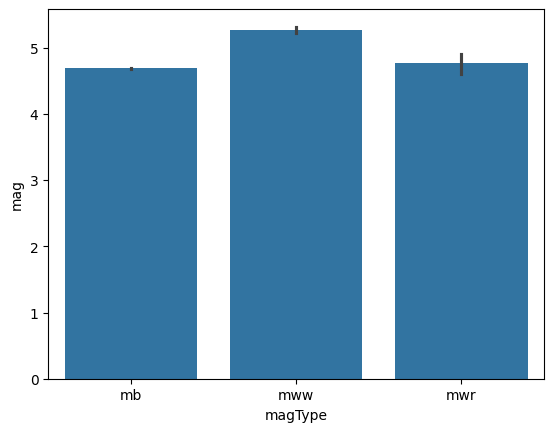

In [26]:
sns.barplot(df, x='magType', y='mag')

<Axes: xlabel='magType', ylabel='mag'>

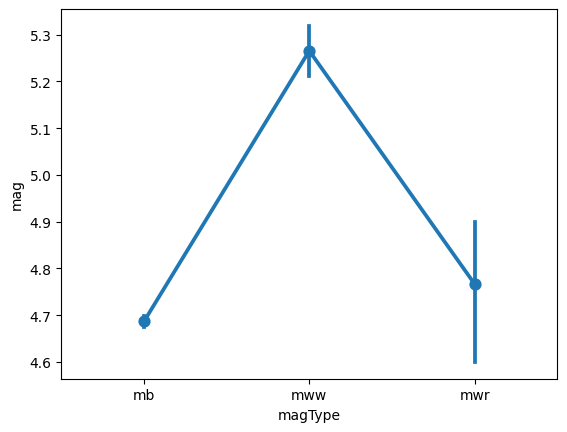

In [27]:
sns.pointplot(df, x='magType', y='mag')

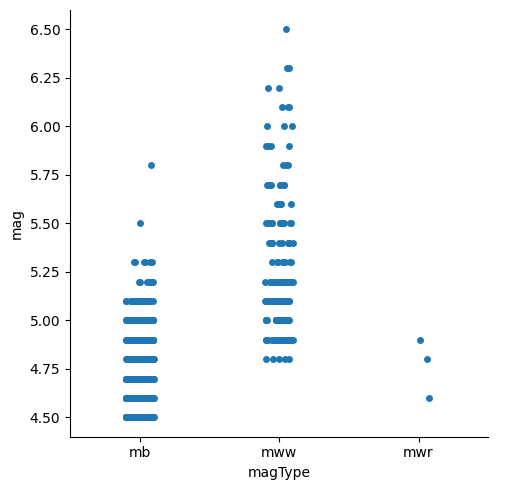

In [28]:
sns.catplot(df, x='magType', y='mag')

c:\Users\Rishi\AppData\Local\pypoetry\Cache\virtualenvs\eq-L7llixk8-py3.11\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 81.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Rishi\AppData\Local\pypoetry\Cache\virtualenvs\eq-L7llixk8-py3.11\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Rishi\AppData\Local\pypoetry\Cache\virtualenvs\eq-L7llixk8-py3.11\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 86.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Rishi\AppData\Local\pypoetry\Cache\virtualenvs\eq-L7llixk8-py3.11\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 24.6% of the points cannot be placed; you m

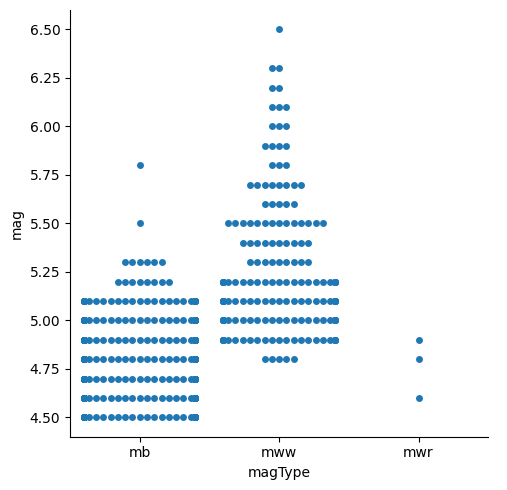

In [29]:
sns.catplot(df, x='magType', y='mag', kind='swarm')

<Axes: xlabel='depth', ylabel='mag'>

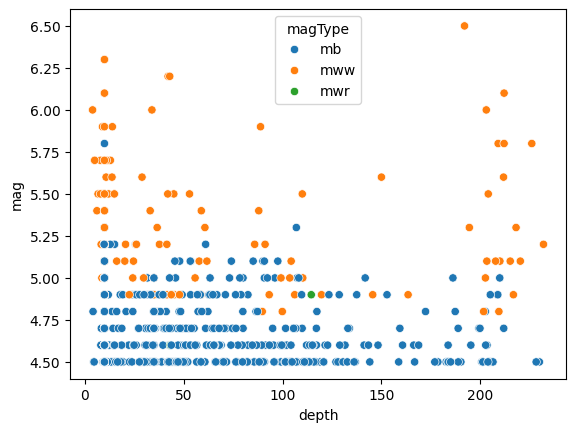

In [30]:
sns.scatterplot(df, x='depth', y='mag', hue='magType')

In [31]:
# Map Visualization
import folium

m = folium.Map()

for lat, lon in zip(df2['latitude'], df2['longitude']):
    folium.Marker([lat, lon]).add_to(m)

m.save('map_viz.html')

In [32]:
df['time'] = pd.to_datetime(df['time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             1066 non-null   datetime64[ns, UTC]
 1   latitude         1066 non-null   float64            
 2   longitude        1066 non-null   float64            
 3   depth            1066 non-null   float64            
 4   mag              1066 non-null   float64            
 5   magType          1066 non-null   object             
 6   nst              349 non-null    float64            
 7   gap              1066 non-null   int64              
 8   dmin             1066 non-null   float64            
 9   rms              1066 non-null   float64            
 10  net              1066 non-null   object             
 11  id               1066 non-null   object             
 12  updated          1066 non-null   object             
 13  place            1

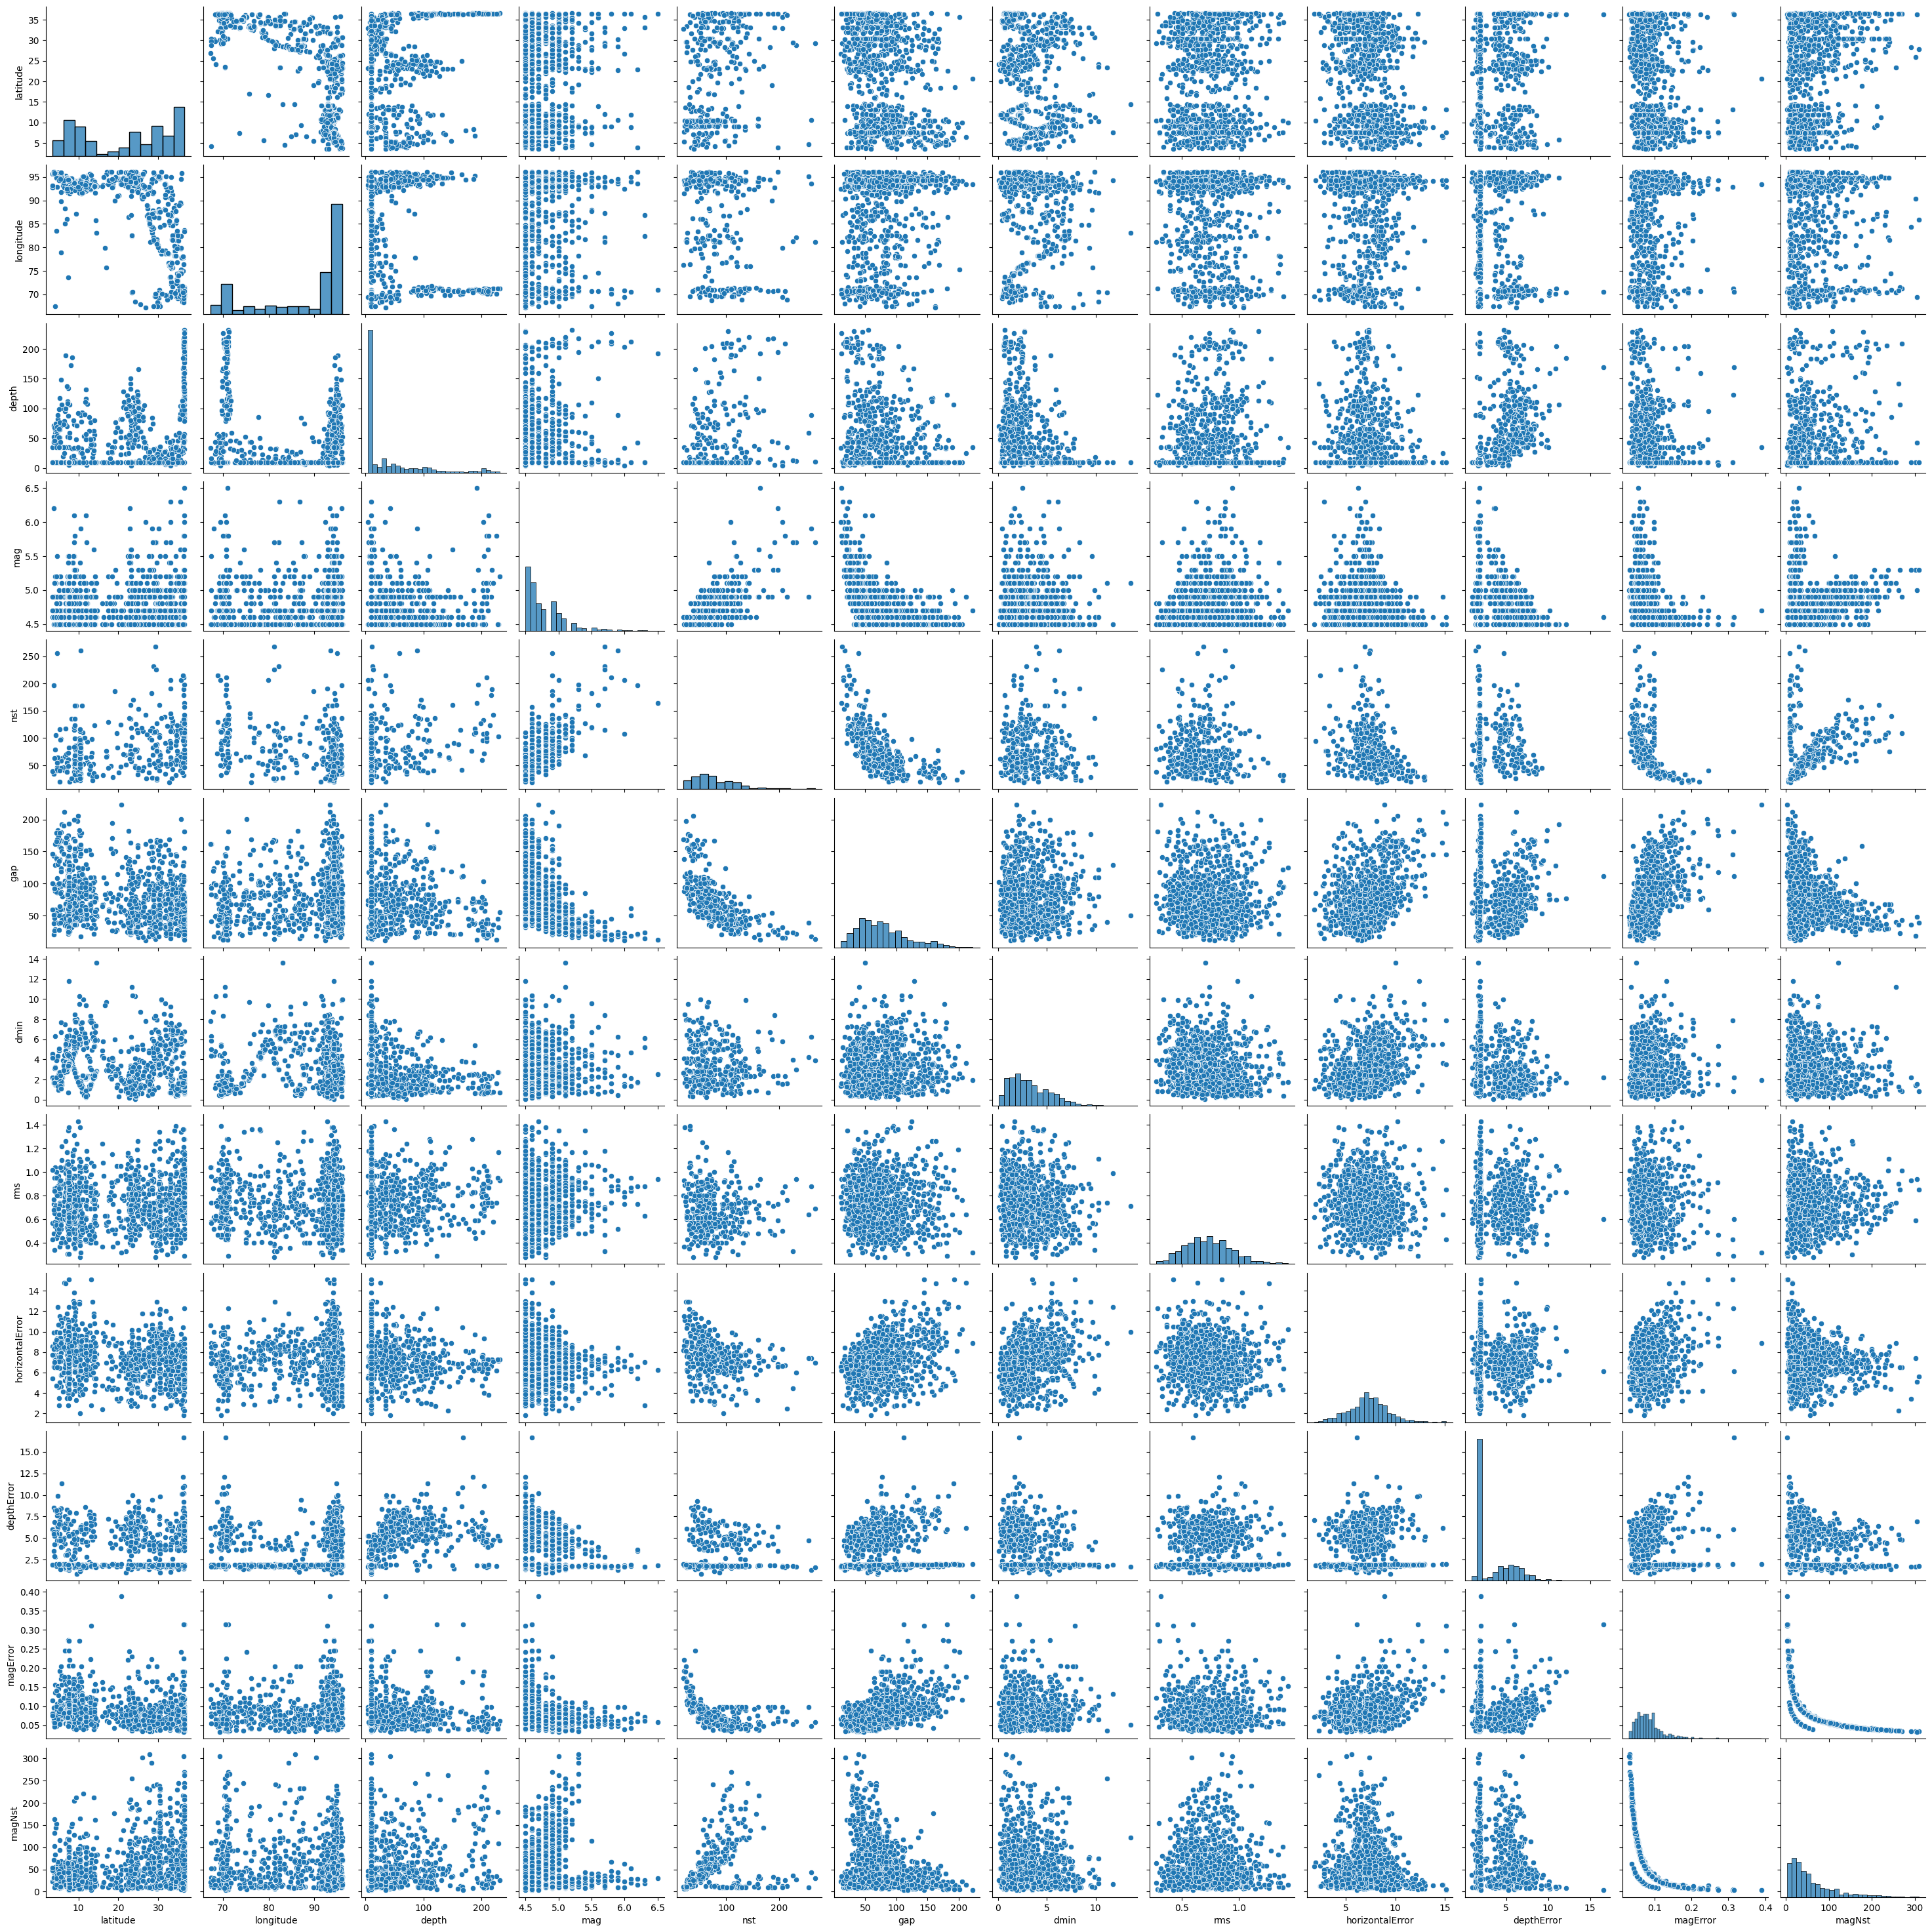

In [33]:
sns.pairplot(df)

<Axes: xlabel='magError', ylabel='mag'>

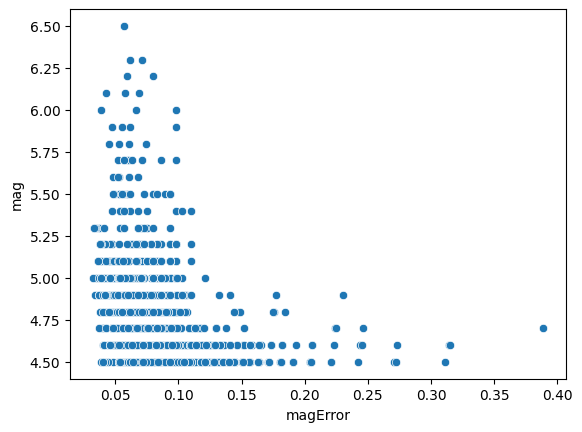

In [34]:
sns.scatterplot(df2, x='magError', y='mag')

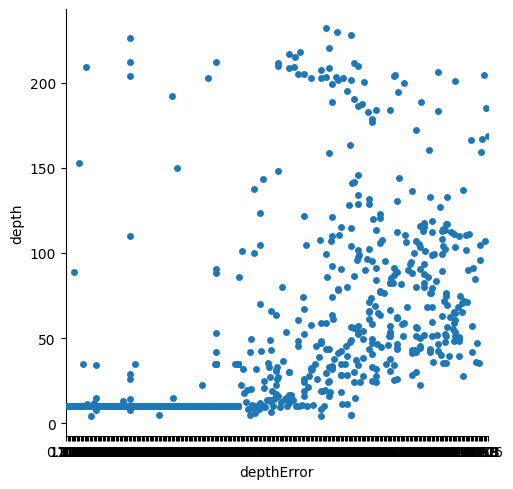

In [35]:
sns.catplot(df2, x='depthError', y='depth', kind='strip')

<Axes: xlabel='depthError', ylabel='depth'>

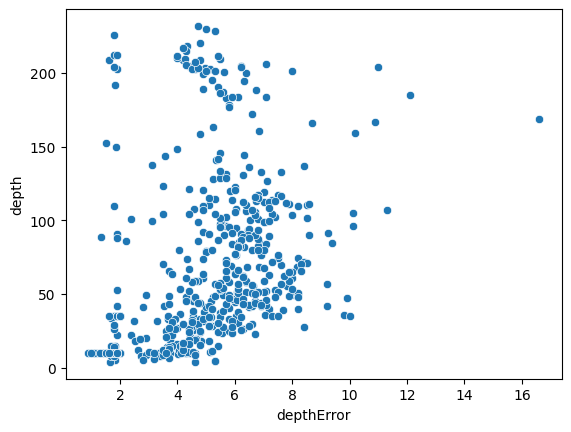

In [36]:
sns.scatterplot(df2, x='depthError', y='depth')

In [29]:
df2.describe()

latitude    longitude        depth          mag          gap  \
count  1066.000000  1066.000000  1066.000000  1066.000000  1066.000000   
mean     21.840075    87.655228    39.709792     4.779644    77.097561   
std      11.337927     9.378554    50.931369     0.310578    39.269263   
min       3.484800    67.191800     4.000000     4.500000    11.000000   
25%       9.995425    81.198875    10.000000     4.500000    48.000000   
50%      23.977300    93.343950    10.000000     4.700000    70.000000   
75%      32.920825    94.370975    50.922500     4.900000    98.000000   
max      36.591100    96.142100   231.910000     6.500000   223.000000   

              dmin          rms  horizontalError   depthError     magError  \
count  1066.000000  1066.000000      1066.000000  1066.000000  1066.000000   
mean      3.265700     0.738490         7.279456     3.409370     0.086590   
std       2.066058     0.205975         1.974504     2.209923     0.040002   
min       0.075000     0.280000         1.800000     0.892000     0.032000   
25%       1.667250     0.590000         6.100000     1.800000     0.060000   
50%       2.852500     0.730000         7.300000     1.900000     0.079500   
75%       4.615500     0.880000         8.475000     5.100000     0.099000   
max      13.581000     1.430000        15.100000    16.600000     0.389000   

        magType_mb  magType_mwr  magType_mww  
count  1066.000000  1066.000000  1066.000000  
mean      0.836773     0.002814     0.160413  
std       0.369746     0.053000     0.367161  
min       0.000000     0.000000     0.000000  
25%       1.000000     0.000000     0.000000  
50%       1.000000     0.000000     0.000000  
75%       1.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000

C:\Users\Rishi\AppData\Local\Temp\ipykernel_18536\2514785769.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(df, x='time', y='mag', kind='line', size='magType', palette=palette)


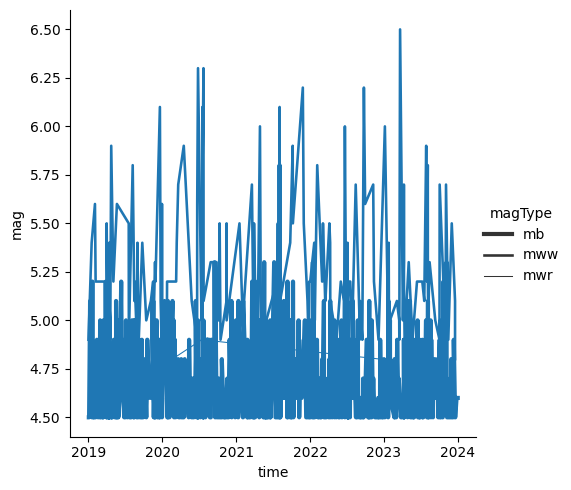

In [38]:
# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")
sns.relplot(df, x='time', y='mag', kind='line', size='magType', palette=palette)

##  Feature Selection

In [30]:
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold

In [31]:
feat_sel = SelectKBest(f_classif, k=7)
feat_sel.fit_transform(X_train, y_train)

array([[2.2322e+01, 9.9000e+01, 9.9700e+00, ..., 6.4000e-02, 1.0000e+00,
        0.0000e+00],
       [3.4705e+01, 7.9000e+01, 5.8800e+00, ..., 5.9000e-02, 1.0000e+00,
        0.0000e+00],
       [1.0000e+01, 1.5400e+02, 7.4700e+00, ..., 1.0000e-01, 1.0000e+00,
        0.0000e+00],
       ...,
       [1.1110e+02, 9.4000e+01, 1.0200e+01, ..., 9.3000e-02, 1.0000e+00,
        0.0000e+00],
       [1.8499e+02, 7.7000e+01, 8.1000e+00, ..., 1.9100e-01, 1.0000e+00,
        0.0000e+00],
       [4.3760e+01, 3.9000e+01, 7.5000e+00, ..., 9.3000e-02, 0.0000e+00,
        1.0000e+00]])

In [32]:
X_train_new = X_train.columns[feat_sel.get_support(indices=True)]
X_train_new

Index(['depth', 'gap', 'horizontalError', 'depthError', 'magError',
       'magType_mb', 'magType_mww'],
      dtype='object')

In [33]:
feat_thresh = VarianceThreshold()
feat_thresh.fit(X_train, y_train)

VarianceThreshold()

In [34]:
varrs = feat_thresh.variances_

feat_names = X_train.columns.tolist()

# Sort together by variance (descending order)
sorted_together = sorted(zip(varrs, feat_names), key=lambda x: x[0], reverse=True)
varrs, feat_names = zip(*sorted_together)


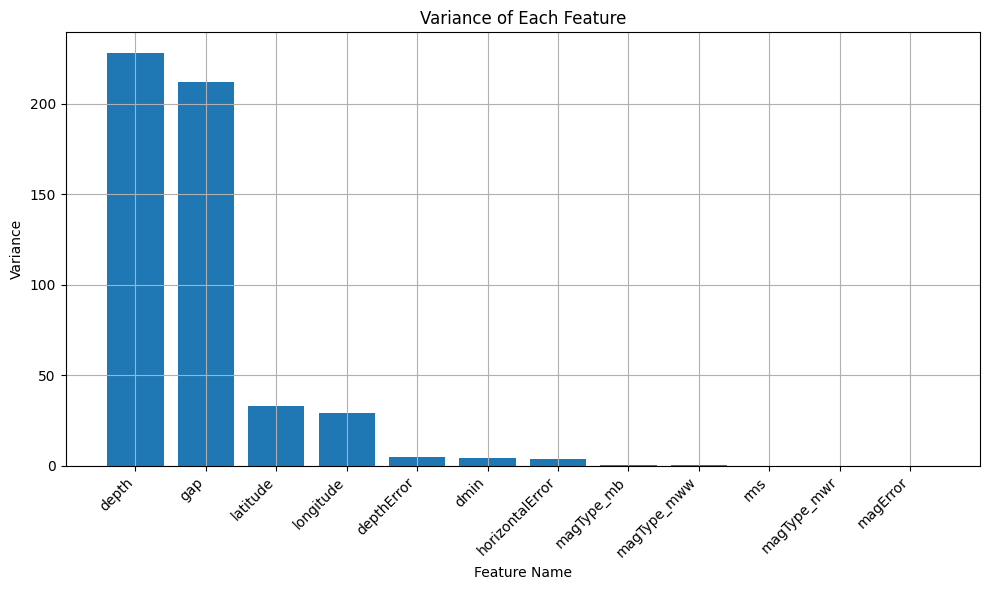

In [35]:
# Create a bar plot to visualize variance
plt.figure(figsize=(10, 6))
plt.bar(feat_names, varrs)
plt.xlabel('Feature Name')
plt.ylabel('Variance')
plt.title('Variance of Each Feature')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

# Modeling

In [73]:

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor

from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error

In [37]:
train_X, test_X, train_y, test_y = train_test_split(X_train, y_train, test_size=0.33, random_state=2)

In [38]:
train_X

latitude  longitude    depth  gap   dmin   rms  horizontalError  \
919   23.9515    94.7518   95.690  134  0.496  0.99             3.00   
521   34.7242    73.2047   10.000   42  1.072  0.84             6.60   
327    5.2885    95.5874  117.110  158  1.355  0.80             9.40   
202   36.5152    70.6088  200.696   71  0.610  0.73             7.65   
465   12.8565    95.7220   10.000   91  3.146  0.43             6.40   
..        ...        ...      ...  ...    ...   ...              ...   
360    7.4278    94.4187   10.000  102  5.262  0.70             7.30   
466   14.1061    92.9896   10.000   31  2.447  0.90             4.80   
299   10.4137    94.2287   10.000   89  1.910  0.77             6.70   
493    8.8640    94.0364   10.000  143  5.508  0.74            12.80   
527   12.8061    93.3096   49.570   98  7.810  0.54            10.60   

     depthError  magError  magType_mb  magType_mwr  magType_mww  
919       5.500     0.110         1.0          0.0          0.0  
521       1.800     0.058         1.0          0.0          0.0  
327       7.500     0.110         1.0          0.0          0.0  
202       5.627     0.063         1.0          0.0          0.0  
465       1.900     0.181         1.0          0.0          0.0  
..          ...       ...         ...          ...          ...  
360       1.800     0.176         1.0          0.0          0.0  
466       1.700     0.046         1.0          0.0          0.0  
299       1.800     0.088         1.0          0.0          0.0  
493       1.900     0.119         1.0          0.0          0.0  
527       8.100     0.124         1.0          0.0          0.0  

[714 rows x 12 columns]

In [39]:
# Defining a pipeline for testing

def mod_pipL(X, y, scale, mod):
    pipL = Pipeline([
        ('scaler', scale),
        ('model', mod)]).fit(X, y)
    return pipL

def pred_pipL(pipeL, test):
    return pipeL.predict(test)

def metr_ics(true, pred):
    MAE = mean_absolute_error(true, pred) * 100
    R2 = r2_score(true, pred) * 100
    RMSE = root_mean_squared_error(true, pred) * 100
    return MAE, R2, RMSE

In [40]:
# Standard Scaler
GBR = mod_pipL(train_X, train_y, StandardScaler(), GradientBoostingRegressor())
SV = mod_pipL(train_X, train_y, StandardScaler(), SVR(kernel='rbf'))
LR = mod_pipL(train_X, train_y, StandardScaler(), LinearRegression())
RF = mod_pipL(train_X, train_y, StandardScaler(), RandomForestRegressor())


In [41]:
pr =  pred_pipL(GBR, test_X)

print("With Standard Scaler", "\nGBR:", metr_ics(test_y, pred_pipL(GBR, test_X)),"\nSVR:", metr_ics(test_y, pred_pipL(SV, test_X)), "\nLR:", metr_ics(test_y, pred_pipL(LR, test_X)), "\nRF:", metr_ics(test_y, pred_pipL(RF, test_X)))


With Standard Scaler 
GBR: (11.864621624015935, 72.61415796894899, 16.293354688361582) 
SVR: (12.765376299478579, 65.58128028756876, 18.266057406201472) 
LR: (15.119166897507174, 56.40772418482418, 20.55664489553388) 
RF: (11.735795454545485, 72.70448006540643, 16.266463687879185)


In [42]:
# MinMax Scaler
GBR_mm = mod_pipL(train_X, train_y, MinMaxScaler(), GradientBoostingRegressor())
SV_mm = mod_pipL(train_X, train_y, MinMaxScaler(), SVR(kernel='poly',degree=3))
LR_mm = mod_pipL(train_X, train_y, MinMaxScaler(), LinearRegression())
RF_mm = mod_pipL(train_X, train_y, MinMaxScaler(), RandomForestRegressor())

In [43]:
pr1 =  pred_pipL(GBR, test_X)

print("With Standard Scaler", "\nGBR:", metr_ics(test_y, pred_pipL(GBR_mm, test_X)), "\nSVR:", metr_ics(test_y, pred_pipL(SV_mm, test_X)), "\nLR:", metr_ics(test_y, pred_pipL(LR_mm, test_X)), "\nRF:", metr_ics(test_y, pred_pipL(RF_mm, test_X)))

With Standard Scaler 
GBR: (11.896812058643095, 72.59671741243474, 16.298542039274206) 
SVR: (13.393697702820088, 63.823595055195405, 18.726653101566043) 
LR: (15.120359268567219, 56.43030228488598, 20.551320671345945) 
RF: (11.750000000000028, 72.5747465121642, 16.305074502910283)


In [44]:
cross_val_score(RF, train_X, train_y, cv=10)

array([0.50276424, 0.63741279, 0.72862458, 0.74995964, 0.62525573,
       0.77569724, 0.70618338, 0.81699884, 0.73592317, 0.72991559])

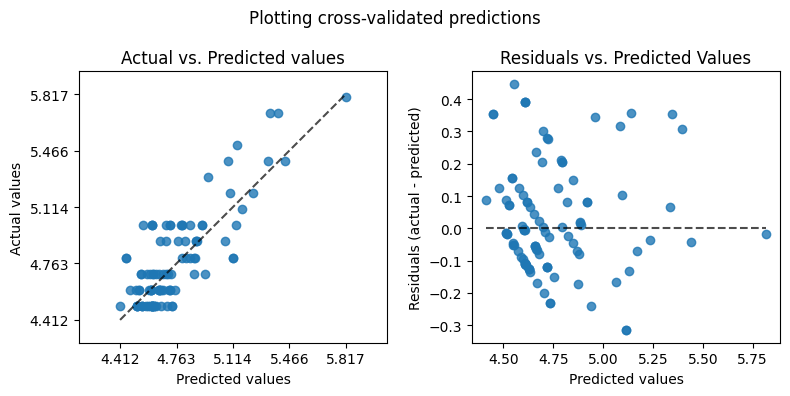

In [45]:
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    test_y,
    y_pred=pred_pipL(SV_mm, test_X),
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    test_y,
    y_pred=pred_pipL(SV_mm, test_X),
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

## Cross-Validation

In [47]:
df2.shape

(1066, 13)

In [54]:
df2

latitude  longitude    depth  mag  gap   dmin   rms  horizontalError  \
0      27.7270    85.7990   22.322  4.6   99  0.466  0.55             9.97   
1      34.7111    76.7782   34.705  4.6   79  3.096  0.40             5.88   
2      18.1110    95.9762   10.000  4.5  154  2.840  0.83             7.47   
3       5.9749    94.8546    9.334  4.5   80  2.211  0.44             9.33   
4      33.1609    76.6962   10.000  4.8   51  6.514  0.73             7.42   
...        ...        ...      ...  ...  ...    ...   ...              ...   
1061    3.9401    95.8773   45.600  5.1   92  1.666  0.84             7.00   
1062   36.0731    71.7714  113.400  4.5   68  1.456  0.98             5.80   
1063   11.7558    93.3604  111.100  4.5   94  6.195  1.04            10.20   
1064   36.2364    70.3225  184.990  4.5   77  1.678  0.83             8.10   
1065    5.3785    94.5625   43.760  4.9   39  2.379  0.93             7.50   

      depthError  magError  magType_mb  magType_mwr  magType_mww  
0          2.373     0.064         1.0          0.0          0.0  
1          5.172     0.059         1.0          0.0          0.0  
2          1.904     0.100         1.0          0.0          0.0  
3          4.016     0.083         1.0          0.0          0.0  
4          1.799     0.098         0.0          0.0          1.0  
...          ...       ...         ...          ...          ...  
1061       4.300     0.056         1.0          0.0          0.0  
1062       7.400     0.121         1.0          0.0          0.0  
1063       8.600     0.093         1.0          0.0          0.0  
1064      12.100     0.191         1.0          0.0          0.0  
1065       4.700     0.093         0.0          0.0          1.0  

[1066 rows x 13 columns]

In [68]:
# KFold Cross-Validation

kf = KFold(n_splits=5, random_state=0, shuffle=True)
kf.get_n_splits(X_train)

from sklearn.metrics import mean_squared_error

# Initialize an empty list to store the scores from each fold
scores = []

for train_index, test_index in kf.split(X_train, y_train):
    xl, X_t = X_train.iloc[train_index], X_train.iloc[test_index]
    yl, y_t = y_train.iloc[train_index], y_train.iloc[test_index]
    # print("Train Index:", train_index)
    # print("Test Index:", test_index)
    # model = GradientBoostingRegressor()
    # model.fit(xl, yl)
    model = mod_pipL(xl, yl, StandardScaler(), RandomForestRegressor())

    #  Make predictions on the testing set
    pred = model.predict(X_t)

    # Evaluate the model performance (e.g., mean squared error for regression)
    score = mean_squared_error(y_t, pred)
    scores.append(score)

score

0.03392424882629091

## Final Modeling

In [98]:
model = RandomForestRegressor(n_estimators=100, criterion='squared_error', n_jobs=-1, random_state=2)

model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

In [109]:
# parmas = {'n_estimators': [50, 100, 200, 300, 400, 500], 
#           'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
#           'min_samples_split': [1, 2, 4, 5, 10],
#           'max_features': ['sqrt', 'log2'],
#           'max_samples': [0, 1, 0.2, 0.6, 1.0],
#           'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15, 20],
    'max_features': ['sqrt', 'log2'],
    'max_samples': [0, 1, 0.2, 0.6, 1.0]
}

In [110]:
mosd = RandomForestRegressor()

clf = GridSearchCV(mosd, param_grid, cv=5, scoring='neg_mean_squared_error')
clf.fit(X_train, y_train)

# Get the best hyperparameters
best_params = clf.best_params_
print("Best Hyperparameters:", best_params)

c:\Users\Rishi\AppData\Local\pypoetry\Cache\virtualenvs\eq-L7llixk8-py3.11\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1500 fits failed out of a total of 7500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1500 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Rishi\AppData\Local\pypoetry\Cache\virtualenvs\eq-L7llixk8-py3.11\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Rishi\AppData\Local\pypoetry\Cache\virtualenvs\eq-L7llixk8-py3.11\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Rishi\AppData

Best Hyperparameters: {'max_depth': 40, 'max_features': 'log2', 'max_samples': 1.0, 'min_samples_split': 5, 'n_estimators': 250}


### Models

In [140]:
# Scaling

std = StandardScaler()

scaled_Xtrain = std.fit_transform(train_X)
scaled_Xtest = std.transform(test_X)

In [141]:
model = RandomForestRegressor(max_depth = 40, max_features = 'log2', max_samples= 1.0, min_samples_split = 5, n_estimators = 250)

model

RandomForestRegressor(max_depth=40, max_features='log2', max_samples=1.0,
                      min_samples_split=5, n_estimators=250)

In [142]:
model.fit(scaled_Xtrain, train_y)

RandomForestRegressor(max_depth=40, max_features='log2', max_samples=1.0,
                      min_samples_split=5, n_estimators=250)

In [143]:
preds = model.predict(scaled_Xtest)

In [144]:
p = pd.DataFrame({'predictions':preds, 'actual':test_y})
p = p.sort_values(by='actual')
p = p.reset_index()

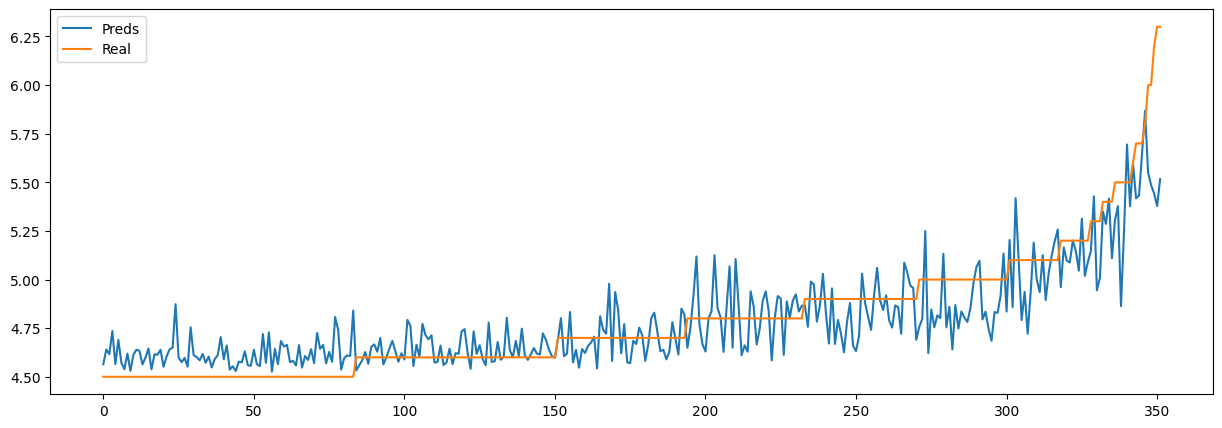

In [145]:
plt.figure(figsize=(15, 5))
plt.plot(p['predictions'], label="Preds")
plt.plot(p['actual'], label="Real")
plt.legend()
plt.show()

In [146]:
mean_absolute_error(preds, test_y)

0.1213627059966548

In [147]:
r2_score(preds, test_y)

0.5235312604649232

---

## Using Torch

In [1]:
import torch

from earthquake_prediction.src.helpers.datapi import url_data_call, url
from earthquake_prediction.src.preprocessing.data_preprocessing import * 

In [126]:
import torch
import torch.nn as nn

# Define the Multivariate Time Series Forecasting Model
class WeatherForecastingModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(WeatherForecastingModel, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers
        self.forecast_len = 7 * 24  # 7 days with 24 hours each
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        
        output, (h_n, c_n) = self.lstm(x, (h_0, c_0))
        output = output[:, -1, :].unsqueeze(1)  # Get the last output and add a new dimension
        
        # Forecast for the next 7 days (forecast_len time steps)
        forecasts = []
        for _ in range(self.forecast_len):
            output, (h_n, c_n) = self.lstm(output, (h_n, c_n))
            forecast = self.fc(output[:, -1, :])
            forecasts.append(forecast)
            output = forecast.unsqueeze(1)  # Concatenate the forecast to the input
        
        forecasts = torch.cat(forecasts, dim=1)  # Combine all forecasts into a single tensor
        
        return forecasts

# Example usage
input_size = 7 * 24 # Number of input features (e.g., temperature, humidity, wind speed, etc.)
hidden_size = 64
output_size = 2  # Number of output features (e.g., temperature, precipitation, wind speed)
num_layers = 2
seq_len = 24 # Input sequence length of 24 hours
num_epochs = 10


In [6]:
import pandas as pd
import torch
from sklearn.preprocessing import MinMaxScaler


# X, y = var_and_tar()

df = url_data_call(url)
df = data_preprocessing(df, ts=True)
df = imput_encode(df)

X, y = var_and_tar(df)

X_train, y_train, X_val, y_val, X_test, y_test = split_dataset(var_and_tar(df)[0], var_and_tar(df)[1])

scaled_train_X, scaled_train_y, scaled_valid_X, scaled_valid_y, scaled_test_X, scaled_test_y = scaler_dataset(X_train, y_train, X_val, y_val, X_test, y_test)

scaled_train_X

array([[3.33333333e-01, 1.19302205e-01, 3.16770186e-01, ...,
        8.98779378e-01, 4.07030666e-01, 2.01754993e-01],
       [3.33333333e-01, 1.75290270e-01, 4.09937888e-01, ...,
        8.92836547e-01, 4.17408872e-01, 1.97013122e-02],
       [3.72549020e-01, 6.60877216e-02, 3.22981366e-01, ...,
        4.62448555e-03, 3.19482729e-01, 8.01644478e-01],
       ...,
       [4.11764706e-01, 4.46833337e-02, 4.72049689e-01, ...,
        1.46581859e-01, 7.22035381e-01, 1.97013122e-02],
       [3.52941176e-01, 3.32829626e-03, 4.96894410e-01, ...,
        2.50718340e-01, 5.28178904e-01, 2.93234213e-01],
       [0.00000000e+00, 2.48665812e-04, 2.85714286e-01, ...,
        2.09946866e-01, 6.44401723e-01, 1.79964193e-02]])

In [75]:
class TimeSeriesPreprocessing:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def cleaning(self, timeseries=False):

        data = self.dataframe.drop(columns=[
            'tz', 'url', 'detail', 'felt', 
            'cdi', 'mmi', 'alert','status',
            'tsunami', 'sig', 'net', 'code',
            'ids', 'sources', 'sources', 'nst',
            'title', 'types', 'gap', 'updated'
        ])

        eq_data = data.loc[data['type'] == 'eqrthquake']
        eq_data = eq_data.copy()
        eq_data.drop('type', axis=1, inplace=True)

        eq_data['time'] = pd.to_datetime(eq_data['time'], unit='ms')
        eq_data['coords'] = eq_data['geometry'].apply(lambda geom: list(geom.coords))

        x, y, z = [], [], []

        for coord_vals in eq_data['coords']:
            x.append(coord_vals[0][0])
            y.append(coord_vals[0][1])
            z.append(coord_vals[0][2])

        eq_data['longitude'] = x
        eq_data['latitude'] = y
        eq_data['elevation'] = z

        eq_data.drop(columns=['place', 'geometry', 'coords'], inplace=True)

        if timeseries is True:
            eq_data = eq_data.set_index('time')

        return eq_data
    
    def imput_encode(self, data):
        df2 = data
        
        LE = LabelEncoder() 

        # Encode labels
        df2['magType']= LE.fit_transform(data['magType']) 

        return df2
    
    def var_and_tar(self, dataframe):
        target_feat = ['dmin', 'rms']

        # Split the data into input and output features
        X = dataframe.values
        y = dataframe[target_feat].values

        return X, y


    def split_dataset(self, X, Y):
        train_size = int(len(X) * 0.7)
        valid_size = int(len(X) * 0.2)
        test_size = len(X) - train_size - valid_size

        X_train, y_train = X[:train_size], Y[:train_size]
        X_val, y_val = X[train_size:train_size + valid_size], Y[train_size:train_size + valid_size]
        X_test, y_test = X[train_size + valid_size:], Y[train_size + valid_size:]
        
        return X_train, y_train, X_val, y_val, X_test, y_test

    
    def scaler_dataset(self, train_X, train_y, valid_X, valid_y, test_X=None, test_y=None):
        scaler_X = MinMaxScaler()
        scaler_y = MinMaxScaler()

        scaled_data_train_X = scaler_X.fit_transform(train_X)
        scaled_data_train_y = scaler_y.fit_transform(train_y)

        scaled_data_valid_X = scaler_X.transform(valid_X)
        scaled_data_valid_y = scaler_y.transform(valid_y)

        if test_X is not None and test_y is not None:
            scaled_data_test_X = scaler_X.transform(test_X)
            scaled_data_test_y = scaler_y.transform(test_y)
            return scaled_data_train_X, scaled_data_train_y, scaled_data_valid_X, scaled_data_valid_y, scaled_data_test_X, scaled_data_test_y

        return scaled_data_train_X, scaled_data_train_y, scaled_data_valid_X, scaled_data_valid_y

In [132]:
target_feat

NameError: name 'target_feat' is not defined

In [129]:
class TimeSeriesPreprocessing:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def cleaning(self, timeseries=False):
        data = self.dataframe.drop(columns=[
            'tz', 'url', 'detail', 'felt', 
            'cdi', 'mmi', 'alert', 'status', 
            'tsunami', 'sig', 'net', 'code', 
            'ids', 'sources', 'nst', 'title', 
            'types', 'gap', 'updated'
        ])

        eq_data = data.loc[data['type'] == 'earthquake']
        eq_data = eq_data.copy()
        eq_data.drop('type', axis=1, inplace=True)

        eq_data['time'] = pd.to_datetime(eq_data['time'], unit='ms')
        eq_data['coords'] = eq_data['geometry'].apply(lambda geom: list(geom.coords))

        x, y, z = [], [], []
        for coord_vals in eq_data['coords']:
            x.append(coord_vals[0][0])
            y.append(coord_vals[0][1])
            z.append(coord_vals[0][2])

        eq_data['longitude'] = x
        eq_data['latitude'] = y
        eq_data['elevation'] = z
        eq_data.drop(columns=['place', 'geometry', 'coords'], inplace=True)

        if timeseries:
            eq_data = eq_data.set_index('time')

        return eq_data
    
    def imput_encode(self, data):
        df2 = data.copy()
        le = LabelEncoder()
        df2['magType'] = le.fit_transform(data['magType'])
        return df2
    
    def var_and_tar(self, dataframe):
        target_feat = ['dmin', 'rms']
        X = dataframe.values
        y = dataframe[target_feat].values
        return X, y

    def split_dataset(self, X, Y):
        train_size = int(len(X) * 0.7)
        valid_size = int(len(X) * 0.2)
        test_size = len(X) - train_size - valid_size

        X_train, y_train = X[:train_size], Y[:train_size]
        X_val, y_val = X[train_size:train_size + valid_size], Y[train_size:train_size + valid_size]
        X_test, y_test = X[train_size + valid_size:], Y[train_size + valid_size:]
        
        return X_train, y_train, X_val, y_val, X_test, y_test
    
    def scaler_dataset(self, train_X, train_y, valid_X, valid_y, test_X=None, test_y=None):
        scaler_X = MinMaxScaler()
        scaler_y = MinMaxScaler()

        scaled_data_train_X = scaler_X.fit_transform(train_X)
        scaled_data_train_y = scaler_y.fit_transform(train_y)

        scaled_data_valid_X = scaler_X.transform(valid_X)
        scaled_data_valid_y = scaler_y.transform(valid_y)

        if test_X is not None and test_y is not None:
            scaled_data_test_X = scaler_X.transform(test_X)
            scaled_data_test_y = scaler_y.transform(test_y)
            return scaled_data_train_X, scaled_data_train_y, scaled_data_valid_X, scaled_data_valid_y, scaled_data_test_X, scaled_data_test_y

        return scaled_data_train_X, scaled_data_train_y, scaled_data_valid_X, scaled_data_valid_y


In [89]:
df

geometry   mag  \
0        POINT Z (143.56020 -4.25900 133.54800)  4.20   
1         POINT Z (141.42080 -2.68860 10.00000)  4.20   
2      POINT Z (-178.33270 -17.50650 540.65400)  4.40   
3        POINT Z (144.58920 13.95260 193.92800)  4.20   
4         POINT Z (-66.81600 18.06417 14.76000)  2.56   
...                                         ...   ...   
18307     POINT Z (-66.78617 18.94883 14.10000)  3.09   
18308      POINT Z (-66.76083 18.97083 8.30000)  3.13   
18309   POINT Z (-177.43350 -29.80200 28.05600)  5.10   
18310      POINT Z (56.69550 27.66790 10.00000)  4.10   
18311   POINT Z (179.95880 -23.94270 503.19900)  4.50   

                                        place           time        updated  \
0      60 km WSW of Angoram, Papua New Guinea  1704064689731  1709415577040   
1         13 km E of Vanimo, Papua New Guinea  1704063151316  1709415577040   
2                  256 km ENE of Levuka, Fiji  1704062899016  1709415577040   
3       54 km NNW of Asan-Maina Village, Guam  1704060829174  1709415577040   
4               4 km NE of Yauco, Puerto Rico  1704058947330  1704059936640   
...                                       ...            ...            ...   
18307                      Puerto Rico region  1682902140850  1682903828880   
18308         54 km N of Hatillo, Puerto Rico  1682902013270  1682903065390   
18309           Kermadec Islands, New Zealand  1682900180641  1689459041040   
18310          67 km NE of Bandar Abbas, Iran  1682900019447  1689459041040   
18311               south of the Fiji Islands  1682899759473  1689458993040   

         tz                                                url  \
0      None  https://earthquake.usgs.gov/earthquakes/eventp...   
1      None  https://earthquake.usgs.gov/earthquakes/eventp...   
2      None  https://earthquake.usgs.gov/earthquakes/eventp...   
3      None  https://earthquake.usgs.gov/earthquakes/eventp...   
4      None  https://earthquake.usgs.gov/earthquakes/eventp...   
...     ...                                                ...   
18307  None  https://earthquake.usgs.gov/earthquakes/eventp...   
18308  None  https://earthquake.usgs.gov/earthquakes/eventp...   
18309  None  https://earthquake.usgs.gov/earthquakes/eventp...   
18310  None  https://earthquake.usgs.gov/earthquakes/eventp...   
18311  None  https://earthquake.usgs.gov/earthquakes/eventp...   

                                                  detail  felt  cdi  ...  \
0      https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
1      https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
2      https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
3      https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
4      https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
...                                                  ...   ...  ...  ...   
18307  https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
18308  https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
18309  https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
18310  https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
18311  https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   

                ids sources                types   nst    dmin   rms    gap  \
0      ,us6000m2x9,    ,us,  ,origin,phase-data,  40.0  6.2370  0.53  117.0   
1      ,us6000m2x8,    ,us,  ,origin,phase-data,  26.0  9.1640  0.68   78.0   
2      ,us6000m2x7,    ,us,  ,origin,phase-data,  46.0  3.4550  0.54   49.0   
3      ,us6000m2x5,    ,us,  ,origin,phase-data,  38.0  0.4520  0.53  100.0   
4      ,pr71435938,    ,pr,  ,origin,phase-data,  14.0  0.1071  0.17   93.0   
...             ...     ...                  ...   ...     ...   ...    ...   
18307  ,pr71407338,    ,pr,  ,origin,phase-data,  10.0  0.5998  0.21  261.0   
18308  ,pr71407353,    ,pr,  ,origin,phase-data,   5.0  0.6209  0.2

In [130]:
df = url_data_call(url)

In [140]:
df

geometry   mag  \
0        POINT Z (143.56020 -4.25900 133.54800)  4.20   
1         POINT Z (141.42080 -2.68860 10.00000)  4.20   
2      POINT Z (-178.33270 -17.50650 540.65400)  4.40   
3        POINT Z (144.58920 13.95260 193.92800)  4.20   
4         POINT Z (-66.81600 18.06417 14.76000)  2.56   
...                                         ...   ...   
18307     POINT Z (-66.78617 18.94883 14.10000)  3.09   
18308      POINT Z (-66.76083 18.97083 8.30000)  3.13   
18309   POINT Z (-177.43350 -29.80200 28.05600)  5.10   
18310      POINT Z (56.69550 27.66790 10.00000)  4.10   
18311   POINT Z (179.95880 -23.94270 503.19900)  4.50   

                                        place           time        updated  \
0      60 km WSW of Angoram, Papua New Guinea  1704064689731  1709415577040   
1         13 km E of Vanimo, Papua New Guinea  1704063151316  1709415577040   
2                  256 km ENE of Levuka, Fiji  1704062899016  1709415577040   
3       54 km NNW of Asan-Maina Village, Guam  1704060829174  1709415577040   
4               4 km NE of Yauco, Puerto Rico  1704058947330  1704059936640   
...                                       ...            ...            ...   
18307                      Puerto Rico region  1682902140850  1682903828880   
18308         54 km N of Hatillo, Puerto Rico  1682902013270  1682903065390   
18309           Kermadec Islands, New Zealand  1682900180641  1689459041040   
18310          67 km NE of Bandar Abbas, Iran  1682900019447  1689459041040   
18311               south of the Fiji Islands  1682899759473  1689458993040   

         tz                                                url  \
0      None  https://earthquake.usgs.gov/earthquakes/eventp...   
1      None  https://earthquake.usgs.gov/earthquakes/eventp...   
2      None  https://earthquake.usgs.gov/earthquakes/eventp...   
3      None  https://earthquake.usgs.gov/earthquakes/eventp...   
4      None  https://earthquake.usgs.gov/earthquakes/eventp...   
...     ...                                                ...   
18307  None  https://earthquake.usgs.gov/earthquakes/eventp...   
18308  None  https://earthquake.usgs.gov/earthquakes/eventp...   
18309  None  https://earthquake.usgs.gov/earthquakes/eventp...   
18310  None  https://earthquake.usgs.gov/earthquakes/eventp...   
18311  None  https://earthquake.usgs.gov/earthquakes/eventp...   

                                                  detail  felt  cdi  ...  \
0      https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
1      https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
2      https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
3      https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
4      https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
...                                                  ...   ...  ...  ...   
18307  https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
18308  https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
18309  https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
18310  https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
18311  https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   

                ids sources                types   nst    dmin   rms    gap  \
0      ,us6000m2x9,    ,us,  ,origin,phase-data,  40.0  6.2370  0.53  117.0   
1      ,us6000m2x8,    ,us,  ,origin,phase-data,  26.0  9.1640  0.68   78.0   
2      ,us6000m2x7,    ,us,  ,origin,phase-data,  46.0  3.4550  0.54   49.0   
3      ,us6000m2x5,    ,us,  ,origin,phase-data,  38.0  0.4520  0.53  100.0   
4      ,pr71435938,    ,pr,  ,origin,phase-data,  14.0  0.1071  0.17   93.0   
...             ...     ...                  ...   ...     ...   ...    ...   
18307  ,pr71407338,    ,pr,  ,origin,phase-data,  10.0  0.5998  0.21  261.0   
18308  ,pr71407353,    ,pr,  ,origin,phase-data,   5.0  0.6209  0.2

In [139]:
preprocessor = TimeSeriesPreprocessing(df)

df_cleaned = preprocessor.cleaning(timeseries=True)
df_encoded = preprocessor.imput_encode(df_cleaned)

X, y = preprocessor.var_and_tar(df_encoded)
# print(df_cleaned)
X_train, y_train, X_val, y_val, X_test, y_test = preprocessor.split_dataset(X, y)
scaled_train_X, scaled_train_y, scaled_valid_X, scaled_valid_y, scaled_test_X, scaled_test_y = preprocessor.scaler_dataset(X_train, y_train, X_val, y_val, X_test, y_test)

In [143]:
scaled_train_X.shape

(12700, 7)

In [95]:
print(len(X_train), len(X_val), len(X_test))

12700 3628 1816


In [115]:
from torch.utils.data import Dataset, DataLoader

class TimseriesDataset(Dataset):
    def __init__(self, data, sequence_length, forecast_length):
        self.data = data
        self.sequence_length = sequence_length
        self.forecast_length = forecast_length

    def __len__(self):
        return len(self.data) - self.sequence_length - self.forecast_length + 1

    def __getitem__(self, idx):
        x = self.data[idx:idx + self.sequence_length]
        y = self.data[idx + self.sequence_length:idx + self.sequence_length + self.forecast_length]

        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

def create_dataloader(data, sequence_length, forecast_length, batch_size):
    dataset = TimseriesDataset(data, sequence_length, forecast_length)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return data_loader

# # Create PyTorch DataLoader
# sequence_length = 24 * 7 # Input sequence length of 24 hours
# train_data = []
# for i in range(len(scaled_train_X) - sequence_length):
#     x_seq = scaled_train_X[i:i+sequence_length]
#     y_seq = scaled_train_y[i+sequence_length]
#     train_data.append((torch.tensor(x_seq, dtype=torch.float32), torch.tensor(y_seq, dtype=torch.float32)))

# valid_data = []
# for i in range(len(scaled_valid_X) - sequence_length):
#     x_seq = scaled_valid_X[i:i+sequence_length]
#     y_seq = scaled_valid_y[i+sequence_length]
#     valid_data.append((torch.tensor(x_seq, dtype=torch.float32), torch.tensor(y_seq, dtype=torch.float32)))

# test_data = []
# for i in range(len(scaled_test_X) - sequence_length):
#     x_seq = scaled_test_X[i:i+sequence_length]
#     y_seq = scaled_test_y[i+sequence_length]
#     test_data.append((torch.tensor(x_seq, dtype=torch.float32), torch.tensor(y_seq, dtype=torch.float32)))

# train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=False)
# valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=32, shuffle=False)
# test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)

In [116]:
# Combine X and y for training
train_data = np.concatenate((scaled_data[0], scaled_data[1]), axis=1)
val_data = np.concatenate((scaled_data[2], scaled_data[3]), axis=1)
test_data = np.concatenate((scaled_data[4], scaled_data[5]), axis=1)

In [117]:
sequence_length = 24  # Past 24 hours
forecast_length = 168  # Next 7 days (168 hours)
batch_size = 32

train_loader = create_dataloader(train_data, sequence_length, forecast_length, batch_size)
val_loader = create_dataloader(val_data, sequence_length, forecast_length, batch_size)
test_loader = create_dataloader(test_data, sequence_length, forecast_length, batch_size)

print("Dataloader created successfully")

Dataloader created successfully


In [121]:
len(test_loader)

51

In [127]:
model = WeatherForecastingModel(input_size, hidden_size, output_size, num_layers)
model.parameters

<bound method Module.parameters of WeatherForecastingModel(
  (lstm): LSTM(168, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=2, bias=True)
)>

In [128]:
# Train the model
model = WeatherForecastingModel(input_size, hidden_size, output_size, num_layers)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    for input_seq, target_seq in train_loader:
        # Forward pass
        output = model(input_seq)
        loss = criterion(output, target_seq)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        test_loss = 0
        for input_seq, target_seq in valid_loader:
            output = model(input_seq)
            test_loss += criterion(output, target_seq).item()
        test_loss /= len(valid_loader)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Test Loss: {test_loss:.4f}')

RuntimeError: input.size(-1) must be equal to input_size. Expected 168, got 9

In [133]:
X.shape

(18144, 7)

In [119]:
for inp, out in train_loader:
    print(f'Input sequence shape: {input_seq.shape}')
    print(f'Target sequence shape: {target_seq.shape}')
    break

Input sequence shape: torch.Size([32, 24, 7])
Target sequence shape: torch.Size([32, 2])


---

In [ ]:
scal

In [145]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler


preprocessor = TimeSeriesPreprocessing(df)

df_cleaned = preprocessor.cleaning(timeseries=True)
df_encoded = preprocessor.imput_encode(df_cleaned)

X, y = preprocessor.var_and_tar(df_encoded)

# Split the data into input and output
train_size = int(len(X) * 0.8)  # Use 80% for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_norm = scaler_X.fit_transform(X_train)
X_test_norm = scaler_X.transform(X_test)
y_train_norm = scaler_y.fit_transform(y_train)
y_test_norm = scaler_y.transform(y_test)

# Create PyTorch DataLoader
sequence_length = 24  # Input sequence length of 24 hours
train_data = []
for i in range(len(X_train_norm) - sequence_length):
    x_seq = X_train_norm[i:i+sequence_length]
    y_seq = y_train_norm[i+sequence_length]
    train_data.append((torch.tensor(x_seq, dtype=torch.float32), torch.tensor(y_seq, dtype=torch.float32)))

test_data = []
for i in range(len(X_test_norm) - sequence_length):
    x_seq = X_test_norm[i:i+sequence_length]
    y_seq = y_test_norm[i+sequence_length]
    test_data.append((torch.tensor(x_seq, dtype=torch.float32), torch.tensor(y_seq, dtype=torch.float32)))

train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)

In [146]:
X_train_norm.shape

(14515, 7)

---

In [151]:
# Define the Multivariate Time Series Forecasting Model
class WeatherForecastingModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(WeatherForecastingModel, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers
        self.forecast_len = 7 * 24  # 7 days with 24 hours each
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        
        output, (h_n, c_n) = self.lstm(x, (h_0, c_0))
        output = output[:, -1, :].unsqueeze(1)  # Get the last output and add a new dimension
        
        # Forecast for the next 7 days (forecast_len time steps)
        forecasts = []
        for _ in range(self.forecast_len):
            output, (h_n, c_n) = self.lstm(output, (h_n, c_n))
            forecast = self.fc(output[:, -1, :])
            forecasts.append(forecast)
            output = torch.cat([output, forecast.unsqueeze(1)], dim=1)  # Concatenate the forecast to the input
        
        forecasts = torch.cat(forecasts, dim=1)  # Combine all forecasts into a single tensor
        
        return forecasts

# Model parameters
input_size = X_train_norm.shape[-1]  # Number of input features (all columns except the two to predict)
hidden_size = 64
output_size = y_train_norm.shape[-1]  # Forecasting two features
num_layers = 2
num_epochs = 100

# Create the model
model = WeatherForecastingModel(input_size, hidden_size, output_size, num_layers)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
for epoch in range(num_epochs):
    for input_seq, target_seq in train_loader:
        # Forward pass
        output = model(input_seq)
        loss = criterion(output, target_seq)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        test_loss = 0
        for input_seq, target_seq in test_loader:
            output = model(input_seq)
            test_loss += criterion(output, target_seq).item()
        test_loss /= len(test_loader)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Test Loss: {test_loss:.4f}')

# Make forecasts
input_seq = torch.tensor(X_test_norm[-sequence_length:], dtype=torch.float32).unsqueeze(0)
with torch.no_grad():
    forecasts = model(input_seq)
    forecasts = scaler_y.inverse_transform(forecasts.squeeze().numpy())

print(forecasts)

RuntimeError: input.size(-1) must be equal to input_size. Expected 7, got 64

In [150]:
# Create the model
model = WeatherForecastingModel(input_size, hidden_size, output_size, num_layers)
model.parameters

<bound method Module.parameters of WeatherForecastingModel(
  (lstm): LSTM(7, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=2, bias=True)
)>

In [137]:
len(train_data)

12676

# Tectoncis Plates Data
> ## Plate Boundaries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your CSV file is named 'tectonic_plates.csv'
data = pd.read_csv(r'C:\Projs\COde\Earthquake\Tectonic_Plates.csv')


In [3]:
data

OBJECTID           LAYER   Name                        Source PlateA  \
0           1  plate boundary  AF-AN         Mueller et al. [1987]     AF   
1           2  plate boundary  AF-AN   by Peter Bird, October 2001     AF   
2           3  plate boundary  AN-AF          Lemaux et al. [2002]     AN   
3           4  plate boundary  SO-AN          Lemaux et al. [2002]     SO   
4           5  plate boundary  SO-AN         Mueller et al. [1987]     SO   
..        ...             ...    ...                           ...    ...   
236       237  plate boundary  CA\ND         Taboada et al. [1997]     CA   
237       238  plate boundary  CA\ND           Perez et al. [1997]     CA   
238       239  plate boundary  ND-SA          Collot et al. [2002]     ND   
239       240  plate boundary  ND-SA  Audemard and Audemard [2002]     ND   
240       241  plate boundary  CA-SA         Taboada et al. [1997]     CA   

    PlateB        Type  Shape__Length  
0       AN         NaN   1.283197e+06  
1       AN         NaN   2.453129e+06  
2       AF         NaN   1.703459e+06  
3       AN         NaN   1.011037e+06  
4       AN         NaN   5.917575e+06  
..     ...         ...            ...  
236     ND  subduction   9.866026e+05  
237     ND  subduction   4.430097e+05  
238     SA         NaN   5.992676e+05  
239     SA         NaN   1.786546e+06  
240     SA         NaN   4.588642e+05  

[241 rows x 8 columns]

In [5]:
# Extract data for lines (replace 'Name' and 'Shape_Length' with your column names if different)
plate_names = data['Name']
shape_lengths = data['Shape__Length']

In [ ]:
# Define starting and ending points for lines (replace with your logic based on data)
start_x = 0  # Adjust x-coordinates based on your data or desired scale
start_y = 0  # Adjust y-coordinates based on your data or desired scale
end_x = []  # Empty list to store end_x coordinates for each line
end_y = []  # Empty list to store end_y coordinates for each line

for shape_length in shape_lengths:
  # Calculate end_x based on shape_length and desired scaling (replace with your logic)
  end_x.append(start_x + shape_length)  # Append to end_x list
  # You can define end_y based on additional data or for a 3D effect
  end_y.append(start_y)  # Append to end_y list (set to start_y for a flat 2D plot)

# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
for i in range(len(plate_names)):
  plt.plot([start_x, end_x[i]], [start_y, end_y[i]], label=plate_names[i])  # Adjust labels if needed
plt.xlabel('X-axis (units based on your data or scaling)')
plt.ylabel('Y-axis (units based on your data or scaling)')
plt.title('Tectonic Plate Boundaries (Line Representation)')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
import geopandas as gpd

def load_and_process_plate_data(shapefile_path):
    # Load the shapefile
    plates = gpd.read_file(shapefile_path)
    
    # Create spatial index
    print("Creating spatial index...")
    spatial_index = plates.sindex
    
    return plates, spatial_index

TECTONIC_PATH = r'C:\Projs\COde\Earthquake\eq_prediction\data\Tectonic_Plates_and_Boundaries\Tectonic_Plates_and_Boundaries.shp'

plates, spatial_index = load_and_process_plate_data(TECTONIC_PATH)

Creating spatial index...


In [2]:
plates

OBJECTID Code       PlateName    Shape__Are    Shape__Len  \
0          1   AF          Africa  7.321846e+13  4.963234e+07   
1          2   AN      Antarctica  9.350352e+14  1.459012e+08   
2          3   SO         Somalia  2.174794e+13  2.599516e+07   
3          4   IN           India  1.352969e+13  1.809340e+07   
4          5   AU       Australia  6.350938e+13  4.931614e+07   
5          6   EU         Eurasia  2.577940e+14  8.582793e+07   
6          7   NA   North America  7.615902e+14  1.659006e+08   
7          8   SA   South America  5.775462e+13  4.382225e+07   
8          9   NZ           Nazca  1.929997e+13  2.242434e+07   
9         10   PA         Pacific  1.501253e+14  9.307447e+07   
10        11   AR          Arabia  5.966435e+12  1.178449e+07   
11        12   SU           Sunda  9.173104e+12  1.434567e+07   
12        13   TI           Timor  3.624293e+11  3.288438e+06   
13        14   KE        Kermadec  3.991331e+11  3.867706e+06   
14        15   KE        Kermadec  3.343176e+11  3.199984e+06   
15        16   TO           Tonga  2.867779e+11  2.922097e+06   
16        17   NI       Niuafo'ou  1.358566e+11  1.848947e+06   
17        18   WL        Woodlark  4.609305e+11  5.105051e+06   
18        19   MO           Maoke  1.159954e+11  1.653067e+06   
19        20   SB  South Bismarck  3.122987e+11  2.798683e+06   
20        21   SS     Solomon Sea  1.310703e+11  1.792456e+06   
21        22   NB  North Bismarck  3.899394e+11  3.847064e+06   
22        23   NH    New Hebrides  7.139075e+11  3.702888e+06   
23        24   CA       Caribbean  3.188299e+12  9.324461e+06   
24        25   CO           Cocos  3.017512e+12  8.227042e+06   
25        26   OK         Okhotsk  8.387844e+12  1.581977e+07   
26        27   JF    Juan de Fuca  5.263140e+11  4.773616e+06   
27        28   AP       Altiplano  9.170856e+11  4.056708e+06   
28        29   ND     North Andes  9.915943e+11  5.422624e+06   
29        30   ON         Okinawa  4.136419e+11  3.815247e+06   
30        31   PS  Philippine Sea  6.184226e+12  1.208414e+07   
31        32   AM            Amur  1.148762e+13  1.532986e+07   
32        33   CL        Caroline  1.539270e+12  5.325454e+06   
33        34   MA         Mariana  4.676412e+11  3.742095e+06   
34        35   FT          Futuna  3.438929e+10  9.526952e+05   
35        36   SC          Scotia  5.730129e+12  1.414840e+07   
36        37   SL        Shetland  3.262196e+11  2.623856e+06   
37        38   AS      Aegean Sea  5.059839e+11  2.956743e+06   
38        39   AT        Anatolia  9.362950e+11  4.278814e+06   
39        40   YA         Yangtze  2.803177e+12  8.066731e+06   
40        41   BU           Burma  5.323259e+11  4.097962e+06   
41        42   RI          Rivera  1.146205e+11  1.578158e+06   
42        43   BH      Birds Head  5.274072e+11  3.584794e+06   
43        44   MS     Molucca Sea  4.196163e+11  2.920903e+06   
44        45   BS       Banda Sea  7.030936e+11  4.993761e+06   
45        46   MN           Manus  8.269168e+09  4.149392e+05   
46        47   CR     Conway Reef  1.624939e+11  1.974332e+06   
47        48   BR   Balmoral Reef  2.096155e+11  2.174242e+06   
48        49   BR   Balmoral Reef  4.334711e+08  9.598882e+04   
49        50   EA          Easter  2.024563e+11  1.962876e+06   
50        51   JZ  Juan Fernandez  1.403501e+11  1.484791e+06   
51        52   GP       Galapagos  1.467367e+10  5.771378e+05   
52        53   SW        Sandwich  6.540730e+11  3.436347e+06   
53        54   PM          Panama  2.812007e+11  2.630166e+06   

                                             geometry  
0   POLYGON Z ((-48746.805 -7333156.477 0, -101818...  
1   POLYGON Z ((-20037507.067 -9808593.925 0, -199...  
2   POLYGON Z ((3576227.697 -5942041.427 0, 357616...  
3   POLYGON Z ((6263413.413 1645813.193 0, 6345377...  
4   MULTIPOLYGON Z (((-20037507.067 -1760839.892 0...  
5   POLYGON Z ((0 4287348.346 0, -83239.929 426980...  
6   POLYGON Z ((20037507.067 6533841

In [8]:
from tqdm import tqdm

def process_earthquake_data(earthquake_csv, plates, spatial_index):
    
    # Load earthquake data
    def check_variable(var):
        if isinstance(var, pd.DataFrame):
            return earthquake_csv
        elif isinstance(var, str):
            earthquakes = pd.read_csv(earthquake_csv)
            return earthquakes
        else:
            return "Unknown type"
        
    earthquakes = check_variable(earthquake_csv)

    print("Enhancing earthquake data with plate information...")
    enhanced_data = []
    
    for _, quake in tqdm(earthquakes.iterrows(), total=len(earthquakes)):
        point = Point(quake['longitude'], quake['latitude'])
        
        # Find nearest plate boundary
        possible_matches_index = list(spatial_index.nearest(point.bounds, 1))
        nearest_boundary = plates.iloc[possible_matches_index]
        
        # Calculate distance to boundary
        distance = point.distance(nearest_boundary.geometry.iloc[0])
        
        enhanced_quake = {
            **quake.to_dict(),
            'plate_name': nearest_boundary['PlateName'].values[0],
            'boundary_type': nearest_boundary['Type'].values[0],
            'distance_to_boundary': distance
        }
        enhanced_data.append(enhanced_quake)
    
    return pd.DataFrame(enhanced_data)

In [10]:
import os
import sys
sys.path.append(os.path.abspath('..'))

from src.helpers.datapi import datas, url_data_call
from src.preprocessing.data_preprocessing import *


#1 This function calls the data from the url and performs basic preprocessing.
def raw_data_prep(TimeSeries: bool) -> pd.DataFrame:
    """
    Calls and defines the data and returns a Pandas DataFrame with basic preprocssing.
    """
    df = pd.DataFrame()

    for key, values in datas.items():
        # print(f"{key} with value: {values}")
        pseudo_df = url_data_call(datas[key])

        df = pd.concat([df, pseudo_df])

    # df = data_preprocessing(df, ts=TimeSeries) ## This function performs basic proecprocessing with an option of Timeseries or not.
    # df = imput_encode(df) ## This function encodes and imputs the input data and fills the empty values.

    return df


EARTHQUAKE_CSV = raw_data_prep(TimeSeries=True)

In [11]:
enhanced_earthquakes = process_earthquake_data(EARTHQUAKE_CSV, plates, spatial_index)

Enhancing earthquake data with plate information...


  0%|          | 0/44969 [00:00<?, ?it/s]


NameError: name 'Point' is not defined

In [14]:
EARTHQUAKE_CSV

geo   mag  \
0            POINT Z (-166.6192 52.6941 35)  3.60   
1        POINT Z (-69.659 -16.5013 190.386)  4.90   
2      POINT Z (-179.7377 -17.7705 613.983)  4.10   
3           POINT Z (-151.1547 62.4049 6.6)  3.00   
4              POINT Z (-176.0293 51.29 10)  2.60   
...                                     ...   ...   
18307     POINT Z (-66.78617 18.94883 14.1)  3.09   
18308      POINT Z (-66.76083 18.97083 8.3)  3.13   
18309    POINT Z (-177.4335 -29.802 28.056)  5.10   
18310          POINT Z (56.6955 27.6679 10)  4.10   
18311   POINT Z (179.9588 -23.9427 503.199)  4.50   

                                             place           time  \
0                     131 km S of Unalaska, Alaska  1672530888008   
1                     27 km NNE of Mazo Cruz, Peru  1672527852381   
2                       105 km ENE of Levuka, Fiji  1672526694316   
3                 22 km WSW of Petersville, Alaska  1672521298931   
4      Andreanof Islands, Aleutian Islands, Alaska  1672520424164   
...                                            ...            ...   
18307                           Puerto Rico region  1682902140850   
18308              54 km N of Hatillo, Puerto Rico  1682902013270   
18309                Kermadec Islands, New Zealand  1682900180641   
18310               67 km NE of Bandar Abbas, Iran  1682900019447   
18311                    south of the Fiji Islands  1682899759473   

             updated    tz                                                url  \
0      1678215612040  None  https://earthquake.usgs.gov/earthquakes/eventp...   
1      1678215602040  None  https://earthquake.usgs.gov/earthquakes/eventp...   
2      1678215611040  None  https://earthquake.usgs.gov/earthquakes/eventp...   
3      1705604849068  None  https://earthquake.usgs.gov/earthquakes/eventp...   
4      1678215613040  None  https://earthquake.usgs.gov/earthquakes/eventp...   
...              ...   ...                                                ...   
18307  1682903828880  None  https://earthquake.usgs.gov/earthquakes/eventp...   
18308  1682903065390  None  https://earthquake.usgs.gov/earthquakes/eventp...   
18309  1689459041040  None  https://earthquake.usgs.gov/earthquakes/eventp...   
18310  1689459041040  None  https://earthquake.usgs.gov/earthquakes/eventp...   
18311  1689458993040  None  https://earthquake.usgs.gov/earthquakes/eventp...   

                                                  detail  felt  cdi  ...  \
0      https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
1      https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
2      https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
3      https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
4      https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
...                                                  ...   ...  ...  ...   
18307  https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
18308  https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
18309  https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
18310  https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   
18311  https://earthquake.usgs.gov/fdsnws/event/1/que...   NaN  NaN  ...   

                             ids  sources  \
0      ,ak022gs16bnt,us7000j3w7,  ,ak,us,   
1                   ,us7000j1b1,     ,us,   
2                   ,us7000j3w5,     ,us,   
3      ,ak022grzqwir,us7000j1as,  ,ak,us,   
4      ,ak022grznty9,us7000j4z8,  ,ak,us,   
...                          ...      ...   
18307               ,pr71407338,     ,pr,   
18308               ,pr71407353,     ,pr,   
18309               ,us7000jx9j,     ,us,   
18310               ,us7000jx9i,     ,us,   
18311               ,us6000k9rv,     ,us,   

                                     types    nst    dmin   rms    gap  \
0                      ,origin,phase-data,   17.0  1.0600  0.51  242.0   

---

# Future Forecasts using Tradional ML


In [1]:
import os
import sys
sys.path.append(os.path.abspath('..'))

import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from xgboost import XGBRegressor


from src.helpers.datapi import datas, url_data_call
from src.model.model import Early_Stopping, ModelCheckPoint, EarthquakeModel
from src.preprocessing.data_preprocessing import *

In [2]:
def raw_data_prep(TimeSeries: bool) -> pd.DataFrame:
    """
    Calls and defines the data and returns a Pandas DataFrame with basic preprocssing.
    """
    df = pd.DataFrame()

    for key, values in datas.items():
        # print(f"{key} with value: {values}")
        pseudo_df = url_data_call(datas[key])

        df = pd.concat([df, pseudo_df])

    df = data_preprocessing(df, ts=TimeSeries) ## This function performs basic proecprocessing with an option of Timeseries or not.
    df = imput_encode(df) ## This function encodes and imputs the input data and fills the empty values.

    return df

def event_counts_for_diff_window(dataFrame: pd.DataFrame) -> pd.DataFrame:
    new_df = dataFrame.copy()

    new_df.reset_index(inplace=True)
    new_df.sort_values('time', inplace=True)

    new_df['time_since_last_event'] = new_df['time'].diff().dt.total_seconds()
    # new_df['time_since_last_event'] = new_df['time_since_last_event'].fillna(0)
    
    # Event counts in different windows
    for window in [1, 7, 30, 90]:
        new_df[f'events_last_{window}'] = new_df['time'].rolling(window).count()

    new_df = new_df.fillna(0)
    daily_df = new_df.resample('D', on='time').agg({
    'mag': ['count', 'max', 'mean'],
    'time_since_last_event': 'mean'
    })

    daily_df.columns = ['_'.join(col).strip() for col in daily_df.columns.values]
    daily_df = daily_df.reset_index()

    # # Merge daily features back to original DataFrame
    new_df = pd.merge_asof(df, daily_df, left_on='time', right_on='time', 
                   tolerance=pd.Timedelta('1D'), direction='backward')
    return new_df

def prep_D(data_Frame: pd.DataFrame):
    """
    Takes in the raw dataframe and returns a curated and scaled dataframe
    """
    df2_ffill = df.copy()
    df2_ffill = CyclicTimeTransform(df2_ffill)

    X1, Y1, target_columns = var_and_tar(df2_ffill)
    scaled_X, scaler_X = scaler_dataset(X1)
    scaled_Y, scaler_Y = scaler_dataset(Y1)

    return scaled_X, scaled_Y, scaler_X, scaler_Y


In [10]:
def spatial_temp_grid(df):
    # Create spatial-temporal grid
    df['time_bin'] = pd.to_datetime(df['time']).dt.to_period('D')  # Daily bins
    df['lat_bin'] = pd.cut(df['latitude'], bins=50)  # Adjust bin number as needed
    df['lon_bin'] = pd.cut(df['longitude'], bins=50)

    return df

def event_counts_for_diff_window2(dataFrame: pd.DataFrame) -> pd.DataFrame:
    new_df = dataFrame.copy()

    new_df =  new_df.sort_values('time')

    if 'time' in dataFrame.index.names:
        new_df = new_df.reset_index(drop=True)

    new_df['time_since_last_event'] = new_df['time'].diff().dt.total_seconds()
    
    # Fill NaN values only for non-categorical columns
    numeric_columns = new_df.select_dtypes(include=[np.number]).columns
    new_df[numeric_columns] = new_df[numeric_columns].fillna(0)

    daily_df = new_df.resample('D', on='time').agg({
        'mag': ['count', 'max', 'mean'],
        'time': lambda x: (x.max() - x.min()).total_seconds()
    })

    daily_df.columns = ['_'.join(col).strip() for col in daily_df.columns.values]
    daily_df = daily_df.reset_index()

    new_df = spatial_temp_grid(df=new_df)

    # Merge daily features back to original DataFrame
    new_df = pd.merge_asof(new_df, daily_df, left_on='time', right_on='time', 
                   tolerance=pd.Timedelta('1D'), direction='backward')
    return new_df

def rolling_windows(new_df: pd.DataFrame):
    
    # Event counts in different windows
    for window in [1, 7, 30, 90]:
        # Create a temporary DataFrame with the rolling calculations
        temp_df = new_df.set_index('time').groupby(['lat_bin', 'lon_bin'])['mag'].rolling(window).agg(['count', 'max'])
        temp_df.columns = [f'eq_count_last_{window}d', f'max_mag_last_{window}d']
        
        # Reset the index to flatten the MultiIndex
        temp_df = temp_df.reset_index()
        
        # Merge the temporary DataFrame with the original DataFrame
        new_df = pd.merge(new_df, temp_df, on=['time', 'lat_bin', 'lon_bin'], how='left')

    return new_df

In [4]:
df  = raw_data_prep(TimeSeries=False) # Getting the Data
df2 = df.copy()

In [5]:
df2

mag                    time     dmin   rms  magType  longitude  \
17655  4.40 2022-05-01 00:02:55.593  20.9710  0.64        0    27.6375   
17654  4.70 2022-05-01 01:22:46.818   2.5540  0.77        0   142.3848   
17653  4.20 2022-05-01 01:33:35.201   1.3460  1.06        0    24.1134   
17652  4.50 2022-05-01 01:52:26.244   1.6090  0.83        0   126.4725   
17651  4.30 2022-05-01 02:10:52.717   2.4160  0.65        0   127.9058   
...     ...                     ...      ...   ...      ...        ...   
4      2.56 2023-12-31 21:42:27.330   0.1071  0.17        2   -66.8160   
3      4.20 2023-12-31 22:13:49.174   0.4520  0.53        0   144.5892   
2      4.40 2023-12-31 22:48:19.016   3.4550  0.54        0  -178.3327   
1      4.20 2023-12-31 22:52:31.316   9.1640  0.68        0   141.4208   
0      4.20 2023-12-31 23:18:09.731   6.2370  0.53        0   143.5602   

        latitude  elevation  
17655 -52.770900     10.000  
17654  29.653000     10.000  
17653  39.603900     10.000  
17652  26.794400     10.000  
17651   3.142900    106.400  
...          ...        ...  
4      18.064167     14.760  
3      13.952600    193.928  
2     -17.506500    540.654  
1      -2.688600     10.000  
0      -4.259000    133.548  

[44568 rows x 8 columns]

In [6]:
# df3 = spatial_temp_grid(df=df2)
df3 = event_counts_for_diff_window2(dataFrame=df2)
df3

mag                    time     dmin   rms  magType  longitude  \
0      4.40 2022-05-01 00:02:55.593  20.9710  0.64        0    27.6375   
1      4.70 2022-05-01 01:22:46.818   2.5540  0.77        0   142.3848   
2      4.20 2022-05-01 01:33:35.201   1.3460  1.06        0    24.1134   
3      4.50 2022-05-01 01:52:26.244   1.6090  0.83        0   126.4725   
4      4.30 2022-05-01 02:10:52.717   2.4160  0.65        0   127.9058   
...     ...                     ...      ...   ...      ...        ...   
44563  2.56 2023-12-31 21:42:27.330   0.1071  0.17        2   -66.8160   
44564  4.20 2023-12-31 22:13:49.174   0.4520  0.53        0   144.5892   
44565  4.40 2023-12-31 22:48:19.016   3.4550  0.54        0  -178.3327   
44566  4.20 2023-12-31 22:52:31.316   9.1640  0.68        0   141.4208   
44567  4.20 2023-12-31 23:18:09.731   6.2370  0.53        0   143.5602   

        latitude  elevation  time_since_last_event    time_bin  \
0     -52.770900     10.000                  0.000  2022-05-01   
1      29.653000     10.000               4791.225  2022-05-01   
2      39.603900     10.000                648.383  2022-05-01   
3      26.794400     10.000               1131.043  2022-05-01   
4       3.142900    106.400               1106.473  2022-05-01   
...          ...        ...                    ...         ...   
44563  18.064167     14.760                730.520  2023-12-31   
44564  13.952600    193.928               1881.844  2023-12-31   
44565 -17.506500    540.654               2069.842  2023-12-31   
44566  -2.688600     10.000                252.300  2023-12-31   
44567  -4.259000    133.548               1538.415  2023-12-31   

                lat_bin               lon_bin  mag_count  mag_max  mag_mean  \
0       (-53.65, -50.6]          (21.6, 28.8]         64      5.5  3.875938   
1      (28.699, 31.749]        (136.8, 144.0]         64      5.5  3.875938   
2      (37.849, 40.898]          (21.6, 28.8]         64      5.5  3.875938   
3      (25.649, 28.699]        (122.4, 129.6]         64      5.5  3.875938   
4        (1.249, 4.299]        (122.4, 129.6]         64      5.5  3.875938   
...                 ...                   ...        ...      ...       ...   
44563  (16.499, 19.549]    (-71.999, -64.799]         73      5.3  3.782055   
44564  (13.449, 16.499]        (144.0, 151.2]         73      5.3  3.782055   
44565  (-20.1, -17.051]  (-180.359, -172.799]         73      5.3  3.782055   
44566  (-4.851, -1.801]        (136.8, 144.0]         73      5.3  3.782055   
44567  (-4.851, -1.801]        (136.8, 144.0]         73      5.3  3.782055   

       time_<lambda>  
0          85836.081  
1          85836.081  
2          85836.081  
3          85836.081  
4          85836.081  
...              ...  
44563      83238.039  
44564      83238.039  
44565      83238.039  
44566      83238.039  
44567      83238.039  

[44568 rows x 16 columns]

In [101]:
df3.time

0       2022-05-01 00:02:55.593
1       2022-05-01 01:22:46.818
2       2022-05-01 01:33:35.201
3       2022-05-01 01:52:26.244
4       2022-05-01 02:10:52.717
                  ...          
44563   2023-12-31 21:42:27.330
44564   2023-12-31 22:13:49.174
44565   2023-12-31 22:48:19.016
44566   2023-12-31 22:52:31.316
44567   2023-12-31 23:18:09.731
Name: time, Length: 44568, dtype: datetime64[ns]

In [108]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44568 entries, 0 to 44567
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   mag                    44568 non-null  float64       
 1   time                   44568 non-null  datetime64[ns]
 2   dmin                   44568 non-null  float64       
 3   rms                    44568 non-null  float64       
 4   magType                44568 non-null  int32         
 5   longitude              44568 non-null  float64       
 6   latitude               44568 non-null  float64       
 7   elevation              44568 non-null  float64       
 8   time_since_last_event  44568 non-null  float64       
 9   time_bin               44568 non-null  period[D]     
 10  lat_bin                44568 non-null  category      
 11  lon_bin                44568 non-null  category      
 12  mag_count              44568 non-null  int64         
 13  m

In [118]:
df3

mag                    time     dmin   rms  magType  longitude  \
0      4.40 2022-05-01 00:02:55.593  20.9710  0.64        0    27.6375   
1      4.70 2022-05-01 01:22:46.818   2.5540  0.77        0   142.3848   
2      4.20 2022-05-01 01:33:35.201   1.3460  1.06        0    24.1134   
3      4.50 2022-05-01 01:52:26.244   1.6090  0.83        0   126.4725   
4      4.30 2022-05-01 02:10:52.717   2.4160  0.65        0   127.9058   
...     ...                     ...      ...   ...      ...        ...   
44563  2.56 2023-12-31 21:42:27.330   0.1071  0.17        2   -66.8160   
44564  4.20 2023-12-31 22:13:49.174   0.4520  0.53        0   144.5892   
44565  4.40 2023-12-31 22:48:19.016   3.4550  0.54        0  -178.3327   
44566  4.20 2023-12-31 22:52:31.316   9.1640  0.68        0   141.4208   
44567  4.20 2023-12-31 23:18:09.731   6.2370  0.53        0   143.5602   

        latitude  elevation  time_since_last_event    time_bin  \
0     -52.770900     10.000                  0.000  2022-05-01   
1      29.653000     10.000               4791.225  2022-05-01   
2      39.603900     10.000                648.383  2022-05-01   
3      26.794400     10.000               1131.043  2022-05-01   
4       3.142900    106.400               1106.473  2022-05-01   
...          ...        ...                    ...         ...   
44563  18.064167     14.760                730.520  2023-12-31   
44564  13.952600    193.928               1881.844  2023-12-31   
44565 -17.506500    540.654               2069.842  2023-12-31   
44566  -2.688600     10.000                252.300  2023-12-31   
44567  -4.259000    133.548               1538.415  2023-12-31   

                lat_bin               lon_bin  mag_count  mag_max  mag_mean  \
0       (-53.65, -50.6]          (21.6, 28.8]         64      5.5  3.875938   
1      (28.699, 31.749]        (136.8, 144.0]         64      5.5  3.875938   
2      (37.849, 40.898]          (21.6, 28.8]         64      5.5  3.875938   
3      (25.649, 28.699]        (122.4, 129.6]         64      5.5  3.875938   
4        (1.249, 4.299]        (122.4, 129.6]         64      5.5  3.875938   
...                 ...                   ...        ...      ...       ...   
44563  (16.499, 19.549]    (-71.999, -64.799]         73      5.3  3.782055   
44564  (13.449, 16.499]        (144.0, 151.2]         73      5.3  3.782055   
44565  (-20.1, -17.051]  (-180.359, -172.799]         73      5.3  3.782055   
44566  (-4.851, -1.801]        (136.8, 144.0]         73      5.3  3.782055   
44567  (-4.851, -1.801]        (136.8, 144.0]         73      5.3  3.782055   

       time_<lambda>  
0          85836.081  
1          85836.081  
2          85836.081  
3          85836.081  
4          85836.081  
...              ...  
44563      83238.039  
44564      83238.039  
44565      83238.039  
44566      83238.039  
44567      83238.039  

[44568 rows x 16 columns]

In [11]:
df3

mag                    time     dmin   rms  magType  longitude  \
0      4.40 2022-05-01 00:02:55.593  20.9710  0.64        0    27.6375   
1      4.70 2022-05-01 01:22:46.818   2.5540  0.77        0   142.3848   
2      4.20 2022-05-01 01:33:35.201   1.3460  1.06        0    24.1134   
3      4.50 2022-05-01 01:52:26.244   1.6090  0.83        0   126.4725   
4      4.30 2022-05-01 02:10:52.717   2.4160  0.65        0   127.9058   
...     ...                     ...      ...   ...      ...        ...   
44563  2.56 2023-12-31 21:42:27.330   0.1071  0.17        2   -66.8160   
44564  4.20 2023-12-31 22:13:49.174   0.4520  0.53        0   144.5892   
44565  4.40 2023-12-31 22:48:19.016   3.4550  0.54        0  -178.3327   
44566  4.20 2023-12-31 22:52:31.316   9.1640  0.68        0   141.4208   
44567  4.20 2023-12-31 23:18:09.731   6.2370  0.53        0   143.5602   

        latitude  elevation  time_since_last_event    time_bin  \
0     -52.770900     10.000                  0.000  2022-05-01   
1      29.653000     10.000               4791.225  2022-05-01   
2      39.603900     10.000                648.383  2022-05-01   
3      26.794400     10.000               1131.043  2022-05-01   
4       3.142900    106.400               1106.473  2022-05-01   
...          ...        ...                    ...         ...   
44563  18.064167     14.760                730.520  2023-12-31   
44564  13.952600    193.928               1881.844  2023-12-31   
44565 -17.506500    540.654               2069.842  2023-12-31   
44566  -2.688600     10.000                252.300  2023-12-31   
44567  -4.259000    133.548               1538.415  2023-12-31   

                lat_bin               lon_bin  mag_count  mag_max  mag_mean  \
0       (-53.65, -50.6]          (21.6, 28.8]         64      5.5  3.875938   
1      (28.699, 31.749]        (136.8, 144.0]         64      5.5  3.875938   
2      (37.849, 40.898]          (21.6, 28.8]         64      5.5  3.875938   
3      (25.649, 28.699]        (122.4, 129.6]         64      5.5  3.875938   
4        (1.249, 4.299]        (122.4, 129.6]         64      5.5  3.875938   
...                 ...                   ...        ...      ...       ...   
44563  (16.499, 19.549]    (-71.999, -64.799]         73      5.3  3.782055   
44564  (13.449, 16.499]        (144.0, 151.2]         73      5.3  3.782055   
44565  (-20.1, -17.051]  (-180.359, -172.799]         73      5.3  3.782055   
44566  (-4.851, -1.801]        (136.8, 144.0]         73      5.3  3.782055   
44567  (-4.851, -1.801]        (136.8, 144.0]         73      5.3  3.782055   

       time_<lambda>  
0          85836.081  
1          85836.081  
2          85836.081  
3          85836.081  
4          85836.081  
...              ...  
44563      83238.039  
44564      83238.039  
44565      83238.039  
44566      83238.039  
44567      83238.039  

[44568 rows x 16 columns]

In [12]:
df4 = rolling_windows(new_df=df3)
df4

C:\Users\Rishi\AppData\Local\Temp\ipykernel_30444\3187555660.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_df = new_df.set_index('time').groupby(['lat_bin', 'lon_bin'])['mag'].rolling(window).agg(['count', 'max'])
C:\Users\Rishi\AppData\Local\Temp\ipykernel_30444\3187555660.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_df = new_df.set_index('time').groupby(['lat_bin', 'lon_bin'])['mag'].rolling(window).agg(['count', 'max'])
C:\Users\Rishi\AppData\Local\Temp\ipykernel_30444\3187555660.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a futu

mag                    time     dmin   rms  magType  longitude  \
0       4.40 2022-05-01 00:02:55.593  20.9710  0.64        0    27.6375   
1       4.70 2022-05-01 01:22:46.818   2.5540  0.77        0   142.3848   
2       4.20 2022-05-01 01:33:35.201   1.3460  1.06        0    24.1134   
3       4.50 2022-05-01 01:52:26.244   1.6090  0.83        0   126.4725   
4       4.30 2022-05-01 02:10:52.717   2.4160  0.65        0   127.9058   
...      ...                     ...      ...   ...      ...        ...   
110097  2.56 2023-12-31 21:42:27.330   0.1071  0.17        2   -66.8160   
110098  4.20 2023-12-31 22:13:49.174   0.4520  0.53        0   144.5892   
110099  4.40 2023-12-31 22:48:19.016   3.4550  0.54        0  -178.3327   
110100  4.20 2023-12-31 22:52:31.316   9.1640  0.68        0   141.4208   
110101  4.20 2023-12-31 23:18:09.731   6.2370  0.53        0   143.5602   

         latitude  elevation  time_since_last_event    time_bin  ...  \
0      -52.770900     10.000                  0.000  2022-05-01  ...   
1       29.653000     10.000               4791.225  2022-05-01  ...   
2       39.603900     10.000                648.383  2022-05-01  ...   
3       26.794400     10.000               1131.043  2022-05-01  ...   
4        3.142900    106.400               1106.473  2022-05-01  ...   
...           ...        ...                    ...         ...  ...   
110097  18.064167     14.760                730.520  2023-12-31  ...   
110098  13.952600    193.928               1881.844  2023-12-31  ...   
110099 -17.506500    540.654               2069.842  2023-12-31  ...   
110100  -2.688600     10.000                252.300  2023-12-31  ...   
110101  -4.259000    133.548               1538.415  2023-12-31  ...   

        mag_mean time_<lambda>  eq_count_last_1d  max_mag_last_1d  \
0       3.875938     85836.081               1.0             4.40   
1       3.875938     85836.081               1.0             4.70   
2       3.875938     85836.081               1.0             4.20   
3       3.875938     85836.081               1.0             4.50   
4       3.875938     85836.081               1.0             4.30   
...          ...           ...               ...              ...   
110097  3.782055     83238.039               1.0             2.56   
110098  3.782055     83238.039               1.0             4.20   
110099  3.782055     83238.039               1.0             4.40   
110100  3.782055     83238.039               1.0             4.20   
110101  3.782055     83238.039               1.0             4.20   

        eq_count_last_7d  max_mag_last_7d  eq_count_last_30d  \
0                    NaN              NaN                NaN   
1                    NaN              NaN                NaN   
2                    NaN              NaN                NaN   
3                    NaN              NaN                NaN   
4                    NaN              NaN                NaN   
...                  ...              ...                ...   
110097               7.0             3.45               30.0   
110098               7.0             4.70               30.0   
110099               7.0             4.40               30.0   
110100               7.0             6.30               30.0   
110101               7.0             6.30               30.0   

        max_mag_last_30d  eq_count_last_90d  max_mag_last_90d  
0                    NaN                NaN               NaN  
1                    NaN                NaN               NaN  
2                    NaN                NaN               NaN  
3                    NaN                NaN               NaN  
4                    NaN                NaN               NaN  
...                  ...                ...               ...  
110097              4.17               90.0              5.25  
110098              5.00               90.0              5.50  
110099              6.20               90.0              6.50  
11010

In [15]:
df41 = df4.copy()

# Select columns with float data type
float_cols = df41.select_dtypes(include=['float64']).columns

# Fill NaN values in float columns with their respective means
for col in float_cols:
    df41[col].fillna(df41[col].mean(), inplace=True)

df41


C:\Users\Rishi\AppData\Local\Temp\ipykernel_30444\3649176938.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df41[col].fillna(df41[col].mean(), inplace=True)


mag                    time     dmin   rms  magType  longitude  \
0       4.40 2022-05-01 00:02:55.593  20.9710  0.64        0    27.6375   
1       4.70 2022-05-01 01:22:46.818   2.5540  0.77        0   142.3848   
2       4.20 2022-05-01 01:33:35.201   1.3460  1.06        0    24.1134   
3       4.50 2022-05-01 01:52:26.244   1.6090  0.83        0   126.4725   
4       4.30 2022-05-01 02:10:52.717   2.4160  0.65        0   127.9058   
...      ...                     ...      ...   ...      ...        ...   
110097  2.56 2023-12-31 21:42:27.330   0.1071  0.17        2   -66.8160   
110098  4.20 2023-12-31 22:13:49.174   0.4520  0.53        0   144.5892   
110099  4.40 2023-12-31 22:48:19.016   3.4550  0.54        0  -178.3327   
110100  4.20 2023-12-31 22:52:31.316   9.1640  0.68        0   141.4208   
110101  4.20 2023-12-31 23:18:09.731   6.2370  0.53        0   143.5602   

         latitude  elevation  time_since_last_event    time_bin  ...  \
0      -52.770900     10.000                  0.000  2022-05-01  ...   
1       29.653000     10.000               4791.225  2022-05-01  ...   
2       39.603900     10.000                648.383  2022-05-01  ...   
3       26.794400     10.000               1131.043  2022-05-01  ...   
4        3.142900    106.400               1106.473  2022-05-01  ...   
...           ...        ...                    ...         ...  ...   
110097  18.064167     14.760                730.520  2023-12-31  ...   
110098  13.952600    193.928               1881.844  2023-12-31  ...   
110099 -17.506500    540.654               2069.842  2023-12-31  ...   
110100  -2.688600     10.000                252.300  2023-12-31  ...   
110101  -4.259000    133.548               1538.415  2023-12-31  ...   

        mag_mean time_<lambda>  eq_count_last_1d  max_mag_last_1d  \
0       3.875938     85836.081               1.0             4.40   
1       3.875938     85836.081               1.0             4.70   
2       3.875938     85836.081               1.0             4.20   
3       3.875938     85836.081               1.0             4.50   
4       3.875938     85836.081               1.0             4.30   
...          ...           ...               ...              ...   
110097  3.782055     83238.039               1.0             2.56   
110098  3.782055     83238.039               1.0             4.20   
110099  3.782055     83238.039               1.0             4.40   
110100  3.782055     83238.039               1.0             4.20   
110101  3.782055     83238.039               1.0             4.20   

        eq_count_last_7d  max_mag_last_7d  eq_count_last_30d  \
0                    7.0         3.979485               30.0   
1                    7.0         3.979485               30.0   
2                    7.0         3.979485               30.0   
3                    7.0         3.979485               30.0   
4                    7.0         3.979485               30.0   
...                  ...              ...                ...   
110097               7.0         3.450000               30.0   
110098               7.0         4.700000               30.0   
110099               7.0         4.400000               30.0   
110100               7.0         6.300000               30.0   
110101               7.0         6.300000               30.0   

        max_mag_last_30d  eq_count_last_90d  max_mag_last_90d  
0               4.126223               90.0          3.817371  
1               4.126223               90.0          3.817371  
2               4.126223               90.0          3.817371  
3               4.126223               90.0          3.817371  
4               4.126223               90.0          3.817371  
...                  ...                ...               ...  
110097          4.170000               90.0          5.250000  
110098          5.000000               90.0          5.500000  
110099          6.200000               90.0          6.500000  
11010

In [23]:
df41['time_bin'] = df41.to_date

0         2022-05-01
1         2022-05-01
2         2022-05-01
3         2022-05-01
4         2022-05-01
             ...    
110097    2023-12-31
110098    2023-12-31
110099    2023-12-31
110100    2023-12-31
110101    2023-12-31
Name: time_bin, Length: 110102, dtype: period[D]

In [25]:
def create_time_features(df):
    df['year'] = df['time_bin'].dt.year
    df['month'] = df['time_bin'].dt.month
    df['day'] = df['time_bin'].dt.day
    df['dayofweek'] = df['time_bin'].dt.dayofweek
    df['quarter'] = df['time_bin'].dt.quarter
    return df
def create_future_grid(agg_df, days_to_forecast=30):
    # Convert time_bin to timestamp if it's not already
    if isinstance(agg_df['time_bin'].dtype, pd.PeriodDtype):
        agg_df['time_bin'] = agg_df['time_bin'].dt.to_timestamp()
    elif not pd.api.types.is_datetime64_any_dtype(agg_df['time_bin']):
        agg_df['time_bin'] = pd.to_datetime(agg_df['time_bin'])
    
    last_date = agg_df['time_bin'].max()
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=days_to_forecast)
    future_grid = pd.MultiIndex.from_product([future_dates, agg_df['lat_bin'].unique(), agg_df['lon_bin'].unique()], 
                                             names=['time_bin', 'lat_bin', 'lon_bin'])
    future_df = pd.DataFrame(index=future_grid).reset_index()
    future_df['time_bin'] = future_df['time_bin'].dt.to_period('D')
    return future_df

future_df = create_future_grid(df41)
future_df = create_time_features(future_df)

In [26]:
future_df

time_bin           lat_bin               lon_bin  year  month  day  \
0      2024-01-01   (-53.65, -50.6]          (21.6, 28.8]  2024      1    1   
1      2024-01-01   (-53.65, -50.6]        (136.8, 144.0]  2024      1    1   
2      2024-01-01   (-53.65, -50.6]        (122.4, 129.6]  2024      1    1   
3      2024-01-01   (-53.65, -50.6]  (-129.599, -122.399]  2024      1    1   
4      2024-01-01   (-53.65, -50.6]      (-28.799, -21.6]  2024      1    1   
...           ...               ...                   ...   ...    ...  ...   
74995  2024-01-30  (74.448, 77.498]          (57.6, 64.8]  2024      1   30   
74996  2024-01-30  (74.448, 77.498]          (36.0, 43.2]  2024      1   30   
74997  2024-01-30  (74.448, 77.498]  (-136.799, -129.599]  2024      1   30   
74998  2024-01-30  (74.448, 77.498]    (-43.199, -35.999]  2024      1   30   
74999  2024-01-30  (74.448, 77.498]    (-57.599, -50.399]  2024      1   30   

       dayofweek  quarter  
0              0        1  
1              0        1  
2              0        1  
3              0        1  
4              0        1  
...          ...      ...  
74995          1        1  
74996          1        1  
74997          1        1  
74998          1        1  
74999          1        1  

[75000 rows x 8 columns]

In [29]:
df41

mag                    time     dmin   rms  magType  longitude  \
0       4.40 2022-05-01 00:02:55.593  20.9710  0.64        0    27.6375   
1       4.70 2022-05-01 01:22:46.818   2.5540  0.77        0   142.3848   
2       4.20 2022-05-01 01:33:35.201   1.3460  1.06        0    24.1134   
3       4.50 2022-05-01 01:52:26.244   1.6090  0.83        0   126.4725   
4       4.30 2022-05-01 02:10:52.717   2.4160  0.65        0   127.9058   
...      ...                     ...      ...   ...      ...        ...   
110097  2.56 2023-12-31 21:42:27.330   0.1071  0.17        2   -66.8160   
110098  4.20 2023-12-31 22:13:49.174   0.4520  0.53        0   144.5892   
110099  4.40 2023-12-31 22:48:19.016   3.4550  0.54        0  -178.3327   
110100  4.20 2023-12-31 22:52:31.316   9.1640  0.68        0   141.4208   
110101  4.20 2023-12-31 23:18:09.731   6.2370  0.53        0   143.5602   

         latitude  elevation  time_since_last_event   time_bin  ...  mag_mean  \
0      -52.770900     10.000                  0.000 2022-05-01  ...  3.875938   
1       29.653000     10.000               4791.225 2022-05-01  ...  3.875938   
2       39.603900     10.000                648.383 2022-05-01  ...  3.875938   
3       26.794400     10.000               1131.043 2022-05-01  ...  3.875938   
4        3.142900    106.400               1106.473 2022-05-01  ...  3.875938   
...           ...        ...                    ...        ...  ...       ...   
110097  18.064167     14.760                730.520 2023-12-31  ...  3.782055   
110098  13.952600    193.928               1881.844 2023-12-31  ...  3.782055   
110099 -17.506500    540.654               2069.842 2023-12-31  ...  3.782055   
110100  -2.688600     10.000                252.300 2023-12-31  ...  3.782055   
110101  -4.259000    133.548               1538.415 2023-12-31  ...  3.782055   

       time_<lambda>  eq_count_last_1d  max_mag_last_1d  eq_count_last_7d  \
0          85836.081               1.0             4.40               7.0   
1          85836.081               1.0             4.70               7.0   
2          85836.081               1.0             4.20               7.0   
3          85836.081               1.0             4.50               7.0   
4          85836.081               1.0             4.30               7.0   
...              ...               ...              ...               ...   
110097     83238.039               1.0             2.56               7.0   
110098     83238.039               1.0             4.20               7.0   
110099     83238.039               1.0             4.40               7.0   
110100     83238.039               1.0             4.20               7.0   
110101     83238.039               1.0             4.20               7.0   

        max_mag_last_7d  eq_count_last_30d  max_mag_last_30d  \
0              3.979485               30.0          4.126223   
1              3.979485               30.0          4.126223   
2              3.979485               30.0          4.126223   
3              3.979485               30.0          4.126223   
4              3.979485               30.0          4.126223   
...                 ...                ...               ...   
110097         3.450000               30.0          4.170000   
110098         4.700000               30.0          5.000000   
110099         4.400000               30.0          6.200000   
110100         6.300000               30.0          6.300000   
110101         6.300000               30.0          6.300000   

        eq_count_last_90d  max_mag_last_90d  
0                    90.0          3.817371  
1                    90.0          3.817371  
2                    90.0          3.817371  
3                    90.0          3.817371  
4                    90.0          3.817371  
...                   ...               ...  
110097               90.0          5.250000  
110098               90.0          5.500000  
110099               90.0  

In [30]:
def merge_historical_data(future_df, agg_df):
    # Ensure both dataframes have the same type for 'time_bin'
    future_df['time_bin'] = pd.to_datetime(future_df['time_bin'].astype(str))
    agg_df['time_bin'] = pd.to_datetime(agg_df['time_bin'].astype(str))

    merged_df = pd.concat([agg_df, future_df])
    
    # Sort values with explicit category orders for 'lat_bin' and 'lon_bin'
    merged_df = merged_df.sort_values([
        'lat_bin',
        'lon_bin',
        'time_bin'
    ], key=lambda col: col.astype(str) if col.name in ['lat_bin', 'lon_bin'] else col)
    
    # merged_df = add_historical_features(merged_df)
    return merged_df.loc[merged_df['time_bin'] > agg_df['time_bin'].max()]

future_with_history = merge_historical_data(future_df, df41)

In [31]:
future_with_history

mag time  dmin  rms  magType  longitude  latitude  elevation  \
1284   NaN  NaT   NaN  NaN      NaN        NaN       NaN        NaN   
3784   NaN  NaT   NaN  NaN      NaN        NaN       NaN        NaN   
6284   NaN  NaT   NaN  NaN      NaN        NaN       NaN        NaN   
8784   NaN  NaT   NaN  NaN      NaN        NaN       NaN        NaN   
11284  NaN  NaT   NaN  NaN      NaN        NaN       NaN        NaN   
...    ...  ...   ...  ...      ...        ...       ...        ...   
63319  NaN  NaT   NaN  NaN      NaN        NaN       NaN        NaN   
65819  NaN  NaT   NaN  NaN      NaN        NaN       NaN        NaN   
68319  NaN  NaT   NaN  NaN      NaN        NaN       NaN        NaN   
70819  NaN  NaT   NaN  NaN      NaN        NaN       NaN        NaN   
73319  NaN  NaT   NaN  NaN      NaN        NaN       NaN        NaN   

       time_since_last_event   time_bin  ... max_mag_last_7d  \
1284                     NaN 2024-01-01  ...             NaN   
3784                     NaN 2024-01-02  ...             NaN   
6284                     NaN 2024-01-03  ...             NaN   
8784                     NaN 2024-01-04  ...             NaN   
11284                    NaN 2024-01-05  ...             NaN   
...                      ...        ...  ...             ...   
63319                    NaN 2024-01-26  ...             NaN   
65819                    NaN 2024-01-27  ...             NaN   
68319                    NaN 2024-01-28  ...             NaN   
70819                    NaN 2024-01-29  ...             NaN   
73319                    NaN 2024-01-30  ...             NaN   

      eq_count_last_30d  max_mag_last_30d  eq_count_last_90d  \
1284                NaN               NaN                NaN   
3784                NaN               NaN                NaN   
6284                NaN               NaN                NaN   
8784                NaN               NaN                NaN   
11284               NaN               NaN                NaN   
...                 ...               ...                ...   
63319               NaN               NaN                NaN   
65819               NaN               NaN                NaN   
68319               NaN               NaN                NaN   
70819               NaN               NaN                NaN   
73319               NaN               NaN                NaN   

       max_mag_last_90d    year  month   day  dayofweek  quarter  
1284                NaN  2024.0    1.0   1.0        0.0      1.0  
3784                NaN  2024.0    1.0   2.0        1.0      1.0  
6284                NaN  2024.0    1.0   3.0        2.0      1.0  
8784                NaN  2024.0    1.0   4.0        3.0      1.0  
11284               NaN  2024.0    1.0   5.0        4.0      1.0  
...                 ...     ...    ...   ...        ...      ...  
63319               NaN  2024.0    1.0  26.0        4.0      1.0  
65819               NaN  2024.0    1.0  27.0        5.0      1.0  
68319               NaN  2024.0    1.0  28.0        6.0      1.0  
70819               NaN  2024.0    1.0  29.0        0.0      1.0  
73319               NaN  2024.0    1.0  30.0        1.0      1.0  

[75000 rows x 29 columns]

In [13]:
# Create spatial-temporal grid
df2['time_bin'] = pd.to_datetime(df2['time']).dt.to_period('D')  # Daily bins
df2['lat_bin'] = pd.cut(df2['latitude'], bins=50)  # Adjust bin number as needed
df2['lon_bin'] = pd.cut(df2['longitude'], bins=50)

def create_time_features(df):
    df['year'] = df['time_bin'].dt.year
    df['month'] = df['time_bin'].dt.month
    df['day'] = df['time_bin'].dt.day
    df['dayofweek'] = df['time_bin'].dt.dayofweek
    df['quarter'] = df['time_bin'].dt.quarter
    return df

agg_df = create_time_features(df=df2)

In [14]:
agg_df

mag                    time     dmin   rms  magType  longitude  \
0      4.40 2022-05-01 00:02:55.593  20.9710  0.64        0    27.6375   
1      4.70 2022-05-01 01:22:46.818   2.5540  0.77        0   142.3848   
2      4.20 2022-05-01 01:33:35.201   1.3460  1.06        0    24.1134   
3      4.50 2022-05-01 01:52:26.244   1.6090  0.83        0   126.4725   
4      4.30 2022-05-01 02:10:52.717   2.4160  0.65        0   127.9058   
...     ...                     ...      ...   ...      ...        ...   
44563  2.56 2023-12-31 21:42:27.330   0.1071  0.17        2   -66.8160   
44564  4.20 2023-12-31 22:13:49.174   0.4520  0.53        0   144.5892   
44565  4.40 2023-12-31 22:48:19.016   3.4550  0.54        0  -178.3327   
44566  4.20 2023-12-31 22:52:31.316   9.1640  0.68        0   141.4208   
44567  4.20 2023-12-31 23:18:09.731   6.2370  0.53        0   143.5602   

        latitude  elevation    time_bin           lat_bin  \
0     -52.770900     10.000  2022-05-01   (-53.65, -50.6]   
1      29.653000     10.000  2022-05-01  (28.699, 31.749]   
2      39.603900     10.000  2022-05-01  (37.849, 40.898]   
3      26.794400     10.000  2022-05-01  (25.649, 28.699]   
4       3.142900    106.400  2022-05-01    (1.249, 4.299]   
...          ...        ...         ...               ...   
44563  18.064167     14.760  2023-12-31  (16.499, 19.549]   
44564  13.952600    193.928  2023-12-31  (13.449, 16.499]   
44565 -17.506500    540.654  2023-12-31  (-20.1, -17.051]   
44566  -2.688600     10.000  2023-12-31  (-4.851, -1.801]   
44567  -4.259000    133.548  2023-12-31  (-4.851, -1.801]   

                    lon_bin  year  month  day  dayofweek  quarter  
0              (21.6, 28.8]  2022      5    1          6        2  
1            (136.8, 144.0]  2022      5    1          6        2  
2              (21.6, 28.8]  2022      5    1          6        2  
3            (122.4, 129.6]  2022      5    1          6        2  
4            (122.4, 129.6]  2022      5    1          6        2  
...                     ...   ...    ...  ...        ...      ...  
44563    (-71.999, -64.799]  2023     12   31          6        4  
44564        (144.0, 151.2]  2023     12   31          6        4  
44565  (-180.359, -172.799]  2023     12   31          6        4  
44566        (136.8, 144.0]  2023     12   31          6        4  
44567        (136.8, 144.0]  2023     12   31          6        4  

[44568 rows x 16 columns]

In [ ]:
# Feature Correlation

# Set a threshold for highly correlated features
threshold = 0.8

# Create an empty set to hold the columns to remove
columns_to_drop = set()

# Iterate over the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            columns_to_drop.add(colname)

# Drop highly correlated features
df_reduced = df.drop(columns=columns_to_drop)

print(f"Features to drop due to high correlation: {columns_to_drop}")


---

In [1]:
import os, sys
sys.path.append(os.path.abspath('..'))

from src.helpers.datapi import datas, url_data_call
from src.training.training_nn import *